#**Informe: Roles Junior en IT: Qué Busca el Mercado y Qué Ofrece**

##Integrantes:
-  	Ciminelli Lucas
-  	Clemens Fernando
-  	Haberkon Branko
-  	Lorenzo Matías
-   Morondo Martín
-  	Lerman Camila

##*Hipotesis planteada para el análisis:*
*En el mercado actual, los roles Junior están sujetos a una creciente competitividad, donde los empleadores exigen niveles de formación específicos o académicos formales para diferenciar a los candidatos en un entorno saturado.*

In [1]:
# Librerías
import io
import pandas as pd

pd.set_option('display.max_rows', 10)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sysarmy - Encuesta - Copy.csv to Sysarmy - Encuesta - Copy.csv


In [5]:
df=pd.read_csv(io.BytesIO(uploaded['Sysarmy - Encuesta - Copy.csv']))
df=df.drop(columns=['Unnamed: 0'])
df[0:9]

,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2024,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,salir_o_seguir_contestando_sobre_estudios,tengo_edad,genero,sueldo_dolarizado,seniority,_sal
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),1700000.0,1500000.0,Cobro parte del salario en dólares,1000,No,No recibo bono,Dos,...,Terminar encuesta,NaN,NaN,NaN,NaN,31,Hombre Cis,True,Semi-Senior,1700000.0
1,Buenos Aires,Full-Time,Staff (planta permanente),2000000.0,1900000.0,Cobro parte del salario en dólares,NaN,Menos de un sueldo,Performance individual,Tres,...,Responder sobre guardias,"Sí, pasiva",0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,28,Hombre Cis,True,Semi-Senior,2000000.0
2,Córdoba,Full-Time,Contractor,1000000.0,1000000.0,Cobro todo el salario en dólares,1500,No,No recibo bono,No,...,Responder sobre guardias,No,0.0,Neto,Terminar encuesta,27,Hombre Cis,True,Semi-Senior,1000000.0
3,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),850000.0,2700000.0,Cobro parte del salario en dólares,1010,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,NaN,31,Hombre Cis,True,Senior,850000.0
4,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,3300000.0,3000000.0,Cobro todo el salario en dólares,1000,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,NaN,34,Hombre Cis,True,Semi-Senior,3300000.0
5,Córdoba,Full-Time,Contractor,450000.0,450000.0,Mi sueldo está dolarizado (pero cobro en moned...,NaN,No,No recibo bono,No,...,NaN,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Junior,450000.0
6,Córdoba,Full-Time,Staff (planta permanente),835469.0,693439.0,Cobro parte del salario en dólares,1014,Un sueldo,Performance de la compañía,No,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,29,Hombre Cis,True,Senior,835469.0
7,Buenos Aires,Full-Time,Contractor,1050000.0,1050000.0,Cobro parte del salario en dólares,NaN,No,No recibo bono,Dos,...,Terminar encuesta,NaN,NaN,NaN,NaN,28,Hombre Cis,True,Semi-Senior,1050000.0
8,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),860000.0,805000.0,Cobro parte del salario en dólares,1040,Un sueldo,Performance individual,Tres,...,NaN,NaN,NaN,NaN,NaN,32,Hombre Cis,True,Semi-Senior,860000.0


In [6]:
#Se realizan verificaciones en las columnas y filas de salarios que presentan inconsistencias, Por ejemplo:
#Salario Neto Mayor que el Salario Bruto: Se elimina la fila.
#Salario Neto anormalmente bajo: Aquellas filas donde la relación entre el salario neto y el salario bruto sea muy baja, se eliminan.

sueldo_neto_mensual = 'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'
sueldo_bruto_mensual= 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'

verificacion_salarios = (df[sueldo_neto_mensual] > df[sueldo_bruto_mensual]) | (df[sueldo_neto_mensual] / df[sueldo_bruto_mensual] < 0.6)
df = df[~verificacion_salarios]

#Se realizan verificaciones en la columna de edad y se eliminan aquellas que son mayores a 73 años sin discriminar por género.
verificacion_edad= df['tengo_edad'] > 73
df = df[~verificacion_edad]

#Análisis de Habilidades y Tecnologías Solicitadas por el Mercado
Este análisis tiene como objetivo identificar las tecnologías más solicitadas por las empresas a los profesionales IT en posiciones Junior. Se explorará cómo estas demandas tecnológicas se distribuyen entre los Junior activos en el mercado laboral, así como la prevalencia de cada tecnología en este segmento.

###Objetivo principal
Analizar las tecnologías más comunes solicitadas a los profesionales Junior en el mercado laboral actual, con el fin de identificar las habilidades más demandadas por las empresas.

##Relación entre Tecnologías, Herramientas y  Plataformas Utilizadas por Juniors

Este primer análisis se centra en identificar las tecnologías, herramientas, plataformas y sistemas de datos más utilizados por los profesionales IT en posiciones Junior, con el objetivo de comprender mejor las habilidades técnicas que predominan en este nivel de seniority. Al limitar el análisis exclusivamente a Junior, buscamos destacar las demandas específicas del mercado para este segmento en particular.

Para ello, exploraremos cuatro columnas clave:

1.`lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual`: para identificar los lenguajes de programación más utilizados entre los Juniors.\
2.`frameworks_herramientas_y_librerias_que_utilices_en_tu_puesto_actual`: para analizar las herramientas y librerías más empleadas en su trabajo diario.\
3.`plataformas_que_utilizas_en_tu_puesto_actual`: que detalla los entornos o sistemas sobre los que suelen trabajar estos profesionales.\
4.`bases_de_datos`: para entender qué sistemas de gestión de datos son más demandados en el sector para los Juniors.


El análisis busca ofrecer una visión detallada de las habilidades técnicas más frecuentes entre los Juniors y cómo estas se alinean con las expectativas del mercado laboral.

<ipython-input-7-0babf553cbce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'lenguajes_o_tecnologias_normalizado'] = df_junior['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].str.lower().str.strip()
<ipython-input-7-0babf553cbce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'lenguajes_o_tecnologias_separados'] = df_junior['lenguajes_o_tecnologias_normalizado'].str.split(',')


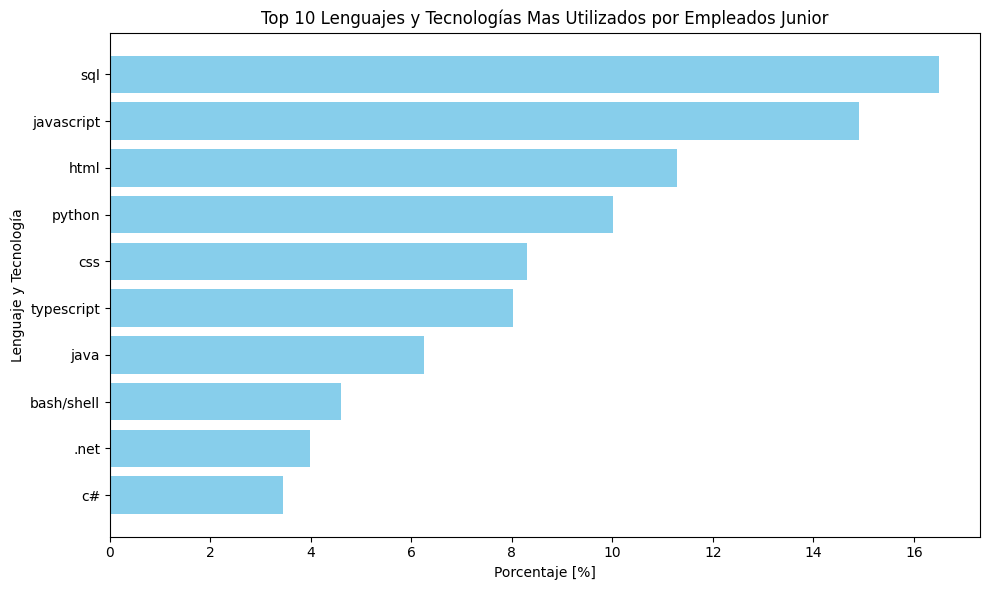

In [7]:
# Punto 1 :
df_junior = df[df['seniority'] == 'Junior']

df_junior.loc[:, 'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'] = df_junior['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].fillna('')

df_junior.loc[:, 'lenguajes_o_tecnologias_normalizado'] = df_junior['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].str.lower().str.strip()

df_junior.loc[:, 'lenguajes_o_tecnologias_separados'] = df_junior['lenguajes_o_tecnologias_normalizado'].str.split(',')

df_junior.loc[:, 'lenguajes_o_tecnologias_separados'] = df_junior['lenguajes_o_tecnologias_separados'].apply(lambda x: [item.strip() for item in x])

df_lenguajes_tecnologias = df_junior.explode('lenguajes_o_tecnologias_separados')

df_lenguajes_tecnologias = df_lenguajes_tecnologias.rename(columns={'lenguajes_o_tecnologias_separados': 'lenguajes_o_tecnologias'})

df_lenguajes_tecnologias = df_lenguajes_tecnologias[df_lenguajes_tecnologias['lenguajes_o_tecnologias'] != 'ninguno de los anteriores']

# Contar la frecuencia de cada lenguaje
conteo_lenguajes = df_lenguajes_tecnologias['lenguajes_o_tecnologias'].value_counts().reset_index()
conteo_lenguajes.columns = ['lenguaje', 'conteo_lenguajes']

# Calcular porcentajes
conteo_lenguajes['porcentaje'] = conteo_lenguajes['conteo_lenguajes'] / conteo_lenguajes['conteo_lenguajes'].sum() * 100

# Graficar el Top 10 lenguajes más usados
plt.figure(figsize=(10, 6))
plt.barh(conteo_lenguajes['lenguaje'][:10], conteo_lenguajes['porcentaje'][:10], color='skyblue')
plt.title('Top 10 Lenguajes y Tecnologías Mas Utilizados por Empleados Junior')
plt.xlabel('Porcentaje [%]')
plt.ylabel('Lenguaje y Tecnología')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el Top 10 de arriba hacia abajo

plt.tight_layout()
plt.show()

<ipython-input-8-323b114ff1aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'plataformas_normalizadas']= df_junior['plataformas_que_utilizas_en_tu_puesto_actual'].str.lower().str.strip()
<ipython-input-8-323b114ff1aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'plataformas_separadas']= df_junior['plataformas_normalizadas'].str.split(',')


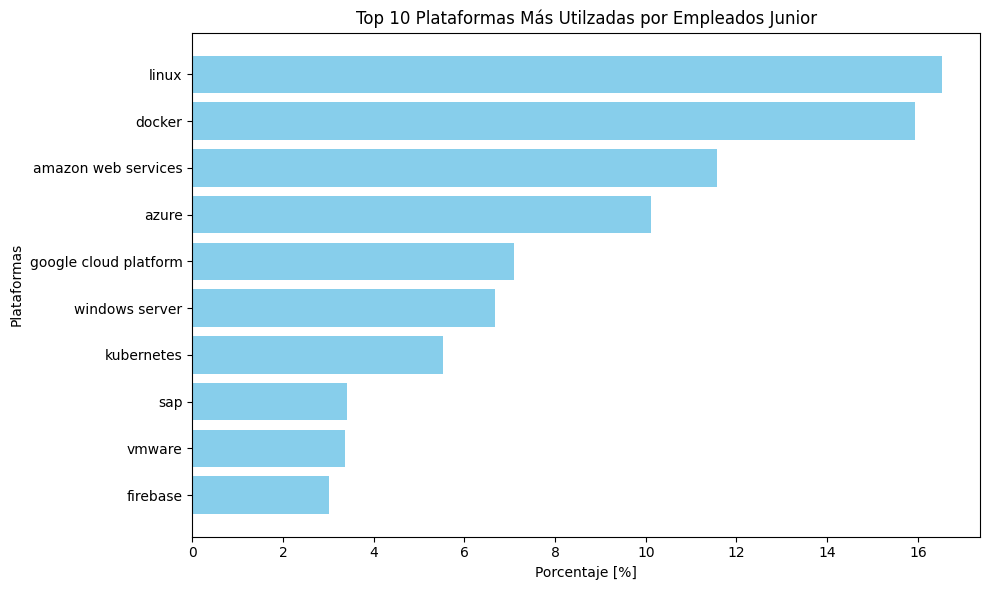

In [8]:
#Punto 2:
df_junior.loc[:, 'plataformas_que_utilizas_en_tu_puesto_actual'] = df_junior['plataformas_que_utilizas_en_tu_puesto_actual'].fillna('')

df_junior.loc[:, 'plataformas_normalizadas']= df_junior['plataformas_que_utilizas_en_tu_puesto_actual'].str.lower().str.strip()

df_junior.loc[:, 'plataformas_separadas']= df_junior['plataformas_normalizadas'].str.split(',')

df_junior.loc[:, 'plataformas_separadas']=df_junior['plataformas_separadas'].apply(lambda x: [item.strip() for item in x])

df_plataformas = df_junior.explode('plataformas_separadas')

df_plataformas = df_plataformas.rename(columns={'plataformas_separadas':'plataformas'})

df_plataformas = df_plataformas[df_plataformas['plataformas'] != 'ninguna de las anteriores']

# Contar la frecuencia de cada lenguaje
conteo_plataformas = df_plataformas['plataformas'].value_counts().reset_index()
conteo_plataformas.columns = ['plataformas', 'conteo_plataformas']

# Calcular porcentajes
conteo_plataformas['porcentaje'] = conteo_plataformas['conteo_plataformas'] / conteo_plataformas['conteo_plataformas'].sum() * 100

# Graficar el Top 10 lenguajes más usados
plt.figure(figsize=(10, 6))
plt.barh(conteo_plataformas['plataformas'][:10], conteo_plataformas['porcentaje'][:10], color='skyblue')
plt.title('Top 10 Plataformas Más Utilzadas por Empleados Junior')
plt.xlabel('Porcentaje [%]')
plt.ylabel('Plataformas')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el Top 10 de arriba hacia abajo

plt.tight_layout()
plt.show()


<ipython-input-9-9433bcad3e19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'frameworks_herramientas_librerias_normalizadas']= df_junior['frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual'].str.lower().str.strip()
<ipython-input-9-9433bcad3e19>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'frameworks_herramientas_librerias_separadas']= df_junior['frameworks_herramientas_librerias_normalizadas'].str.split(',')


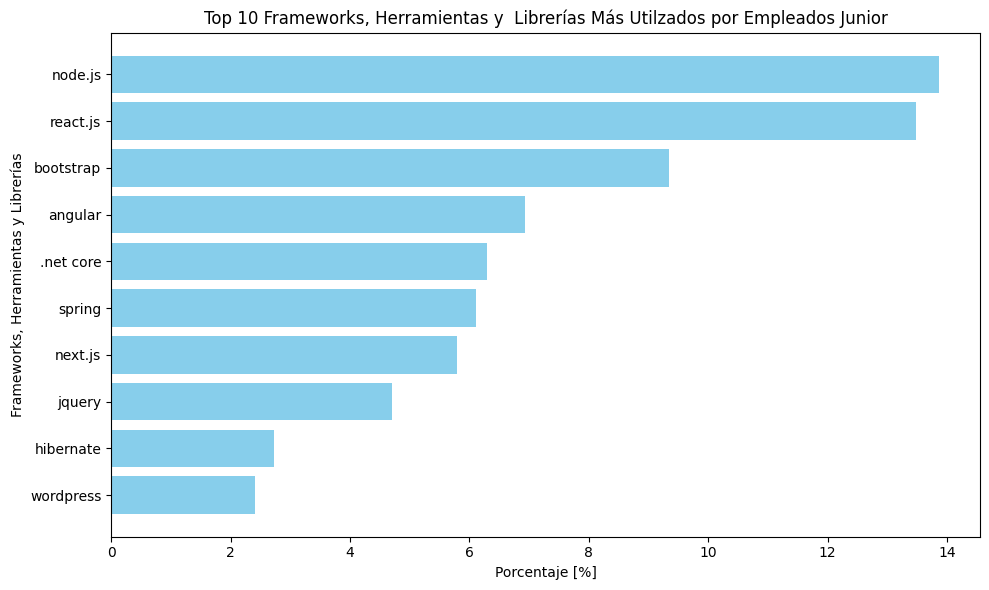

In [9]:
#Punto 3:
df_junior.loc[:, 'frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual'] = df_junior['frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual'].fillna('')

df_junior.loc[:, 'frameworks_herramientas_librerias_normalizadas']= df_junior['frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual'].str.lower().str.strip()

df_junior.loc[:, 'frameworks_herramientas_librerias_separadas']= df_junior['frameworks_herramientas_librerias_normalizadas'].str.split(',')

df_junior.loc[:, 'frameworks_herramientas_librerias_separadas']=df_junior['frameworks_herramientas_librerias_separadas'].apply(lambda x: [item.strip() for item in x])

df_frameworks_herramientas_librerias = df_junior.explode('frameworks_herramientas_librerias_separadas')

df_frameworks_herramientas_librerias = df_frameworks_herramientas_librerias.rename(columns={'frameworks_herramientas_librerias_separadas':'frameworks_herramientas_librerias'})

df_frameworks_herramientas_librerias = df_frameworks_herramientas_librerias[df_frameworks_herramientas_librerias['frameworks_herramientas_librerias'] != 'ninguno de los anteriores']

# Contar la frecuencia de cada lenguaje
conteo_frameworks_herramientas_librerias = df_frameworks_herramientas_librerias['frameworks_herramientas_librerias'].value_counts().reset_index()
conteo_frameworks_herramientas_librerias.columns = ['frameworks_herramientas_librerias', 'conteo_frameworks_herramientas_librerias']

# Calcular porcentajes
conteo_frameworks_herramientas_librerias['porcentaje'] = conteo_frameworks_herramientas_librerias['conteo_frameworks_herramientas_librerias'] / conteo_frameworks_herramientas_librerias['conteo_frameworks_herramientas_librerias'].sum() * 100

# Graficar el Top 10 lenguajes más usados
plt.figure(figsize=(10, 6))
plt.barh(conteo_frameworks_herramientas_librerias['frameworks_herramientas_librerias'][:10], conteo_frameworks_herramientas_librerias['porcentaje'][:10], color='skyblue')
plt.title('Top 10 Frameworks, Herramientas y  Librerías Más Utilzados por Empleados Junior')
plt.xlabel('Porcentaje [%]')
plt.ylabel('Frameworks, Herramientas y Librerías')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el Top 10 de arriba hacia abajo

plt.tight_layout()
plt.show()

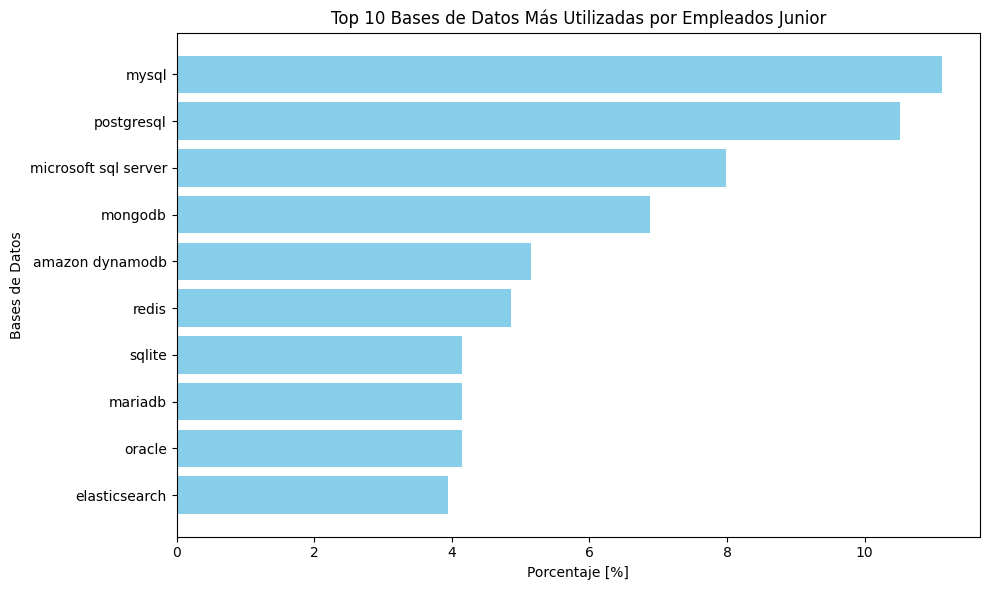

In [10]:
# Punto 4:
df_copia_junior = df_junior.copy()

df_copia_junior['bases_de_datos'] = df_copia_junior['bases_de_datos'].fillna('')

df_copia_junior['bases_de_datos_normalizadas'] = df_copia_junior['bases_de_datos'].str.lower().str.strip()

df_copia_junior['bases_de_datos_separadas'] = df_copia_junior['bases_de_datos_normalizadas'].str.split(',')

df_copia_junior['bases_de_datos_separadas'] = df_copia_junior['bases_de_datos_separadas'].apply(lambda x: [item.strip() for item in x])

df_base_de_datos_top10 = df_copia_junior.explode('bases_de_datos_separadas')

df_base_de_datos_top10 = df_base_de_datos_top10.rename(columns={'bases_de_datos_separadas': 'bases_de_datos_top10'})

# Filtrar valores irrelevantes
df_base_de_datos_top10 = df_base_de_datos_top10[
    (df_base_de_datos_top10['bases_de_datos_top10'] != 'ninguna de las anteriores') &
    (df_base_de_datos_top10['bases_de_datos_top10'] != ' etc)')
]

# Eliminar duplicados antes de contar
df_base_de_datos_top10 = df_base_de_datos_top10.drop_duplicates(subset=['bases_de_datos_top10', 'bases_de_datos'])

# Contar la frecuencia de cada base de datos
conteo_base_de_datos = df_base_de_datos_top10['bases_de_datos_top10'].value_counts().reset_index()
conteo_base_de_datos.columns = ['bases_de_datos_top10', 'conteo_base_de_datos']

# Calcular porcentajes
conteo_base_de_datos['porcentaje'] = conteo_base_de_datos['conteo_base_de_datos'] / conteo_base_de_datos['conteo_base_de_datos'].sum() * 100

# Graficar el Top 10 bases de datos más usadas
plt.figure(figsize=(10, 6))
plt.barh(conteo_base_de_datos['bases_de_datos_top10'][:10], conteo_base_de_datos['porcentaje'][:10], color='skyblue')
plt.title('Top 10 Bases de Datos Más Utilizadas por Empleados Junior')
plt.xlabel('Porcentaje [%]')
plt.ylabel('Bases de Datos')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el Top 10 de arriba hacia abajo

plt.tight_layout()
plt.show()


#Análisis de Nivel Académico y Experiencia
Este análisis busca explorar cómo los niveles académicos alcanzados y la experiencia laboral previa influyen en la contratación de profesionales IT en posiciones Junior. Se pretende identificar patrones relevantes que reflejen las características predominantes de los perfiles contratados.

###Objetivo principal
Evaluar si las empresas priorizan la contratación de Junior con niveles académicos avanzados (universitario completo o superior) o si, por el contrario, tienen una mayor apertura hacia candidatos con estudios incompletos o en curso. Además, analizar la proporción de Junior con poca o ninguna experiencia laboral previa y determinar si esto representa una barrera para su inserción en el mercado laboral.

###¿En qué nivel académico y estado están los Juniors contratados?
En esta sección analizamos la distribución de los profesionales IT Junior contratados según su nivel académico y el estado de sus estudios. Con la intención de identificar tendencias educativas y las expectativas de las empresas al contratar Juniors.


Cantidad de empleados Juniors que reportaron su nivel académico: 525

 Reparto de Empleados Junior por Nivel Académico y Estado:
estado                    Completo  En curso  Incompleto
maximo_nivel_de_estudios                                
Secundario                      28         1           0
Terciario                       47        47           5
Universitario                   85       218          65
Posgrado/Especialización         8         2           1
Maestría                         2         5           2
Doctorado                        3         2           3
Posdoctorado                     1         0           0



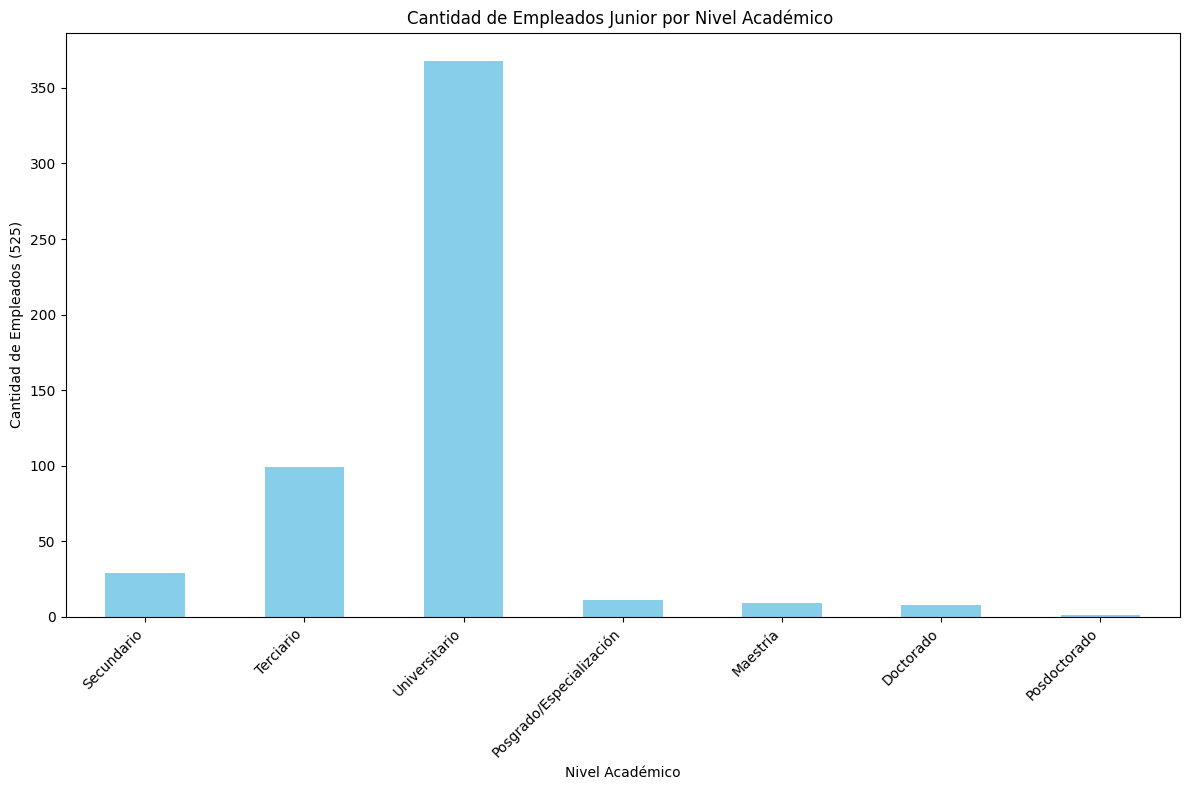

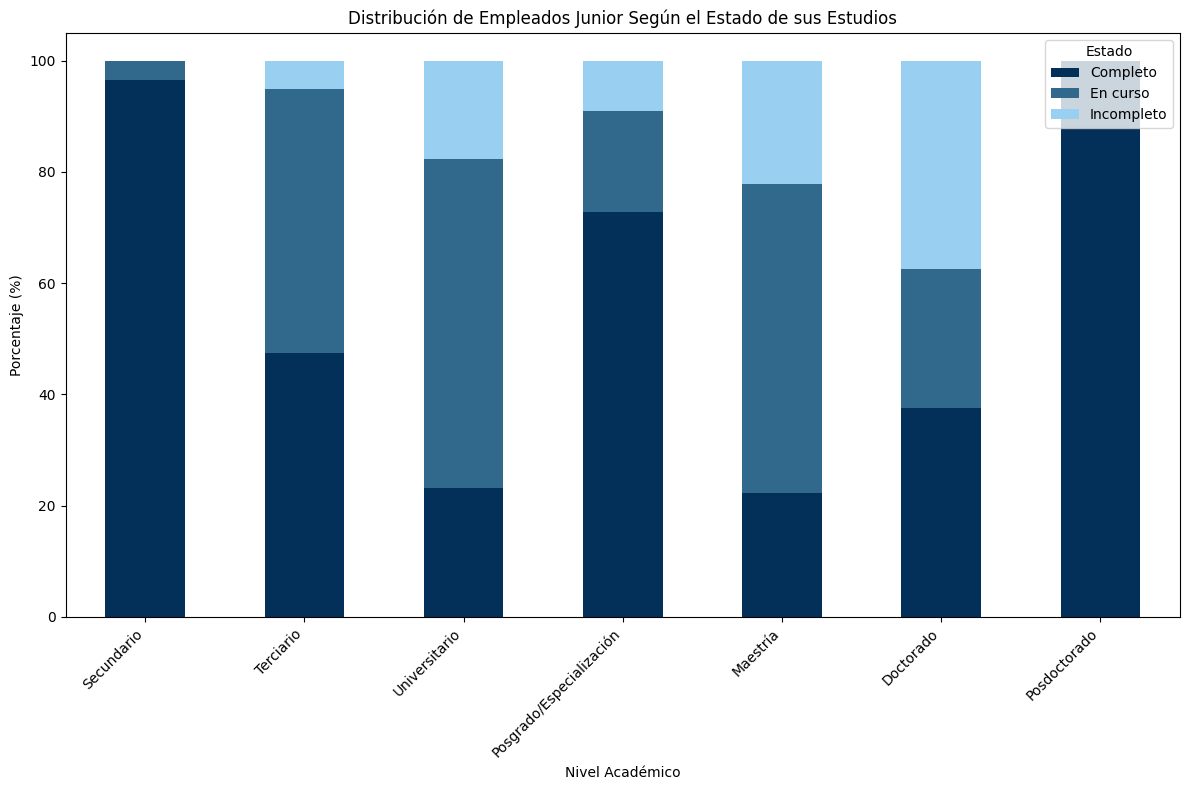

In [11]:
df_nivel_academico = df_junior[df_junior['maximo_nivel_de_estudios'].notna() & df_junior['estado'].notna()]

# Definir el orden deseado para los niveles académicos
orden_niveles = ['Secundario', 'Terciario', 'Universitario', 'Posgrado/Especialización', 'Maestría', 'Doctorado', 'Posdoctorado']

# Agrupar y contar la cantidad de empleados por nivel académico y estado
conteo = df_nivel_academico.groupby(['maximo_nivel_de_estudios', 'estado']).size().unstack(fill_value=0)
conteo = conteo.reindex(orden_niveles, fill_value=0)
conteo_total = conteo.sum(axis=1)
porcentajes = (conteo.div(conteo.sum(axis=1), axis=0)) * 100

print()
print(f'Cantidad de empleados Juniors que reportaron su nivel académico: {len(df_nivel_academico)}')
print()
print(' Reparto de Empleados Junior por Nivel Académico y Estado:')
print(conteo)
print()


# Definir colores para cada estado
colores_estado = {
    'Completo': '#023059',
    'En curso': '#30698C',
    'Incompleto': '#99D0F2'
}

# Gráfico 1: Cantidad total de Juniors contratados según su nivel académico
plt.figure(figsize=(12, 8))
conteo_total.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Empleados Junior por Nivel Académico ')
plt.ylabel(f'Cantidad de Empleados ({len(df_nivel_academico)})')
plt.xlabel('Nivel Académico')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Distribución porcentual del estado de los estudios por nivel académico
ax = porcentajes.plot(
    kind='bar',
    stacked=True,
    color=[colores_estado.get(estado, '#d3d3d3') for estado in porcentajes.columns],
    figsize=(12, 8)
)
ax.set_title('Distribución de Empleados Junior Según el Estado de sus Estudios')
ax.set_xlabel('Nivel Académico')
ax.set_ylabel('Porcentaje (%)')
ax.legend(title='Estado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



###¿Cuánto influyen los años de experiencia para que los Juniors sean contratados?
En esta sección analizamos la distribución de los profesionales IT Junior contratados según sus años de experiencia. La intención es identificar las expectativas de las empresas y la predisposición de entrenar a los nuevos ingresantes.


anos_de_experiencia
2    603
1    265
0    163
Name: count, dtype: int64



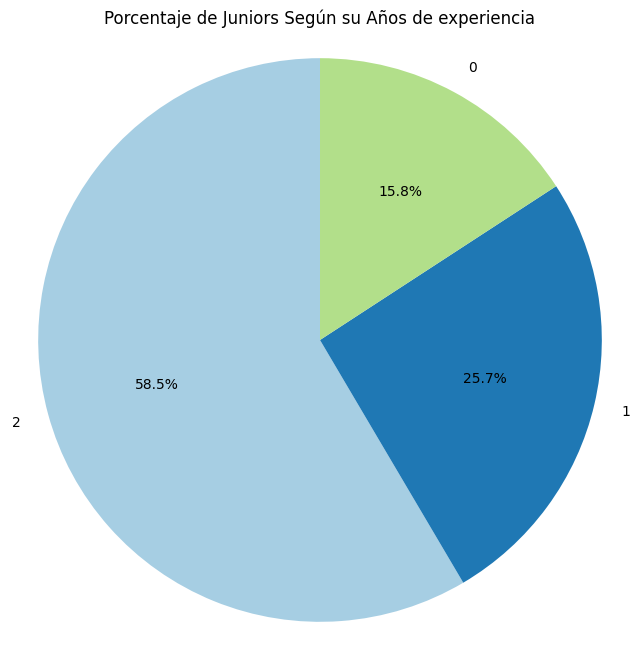

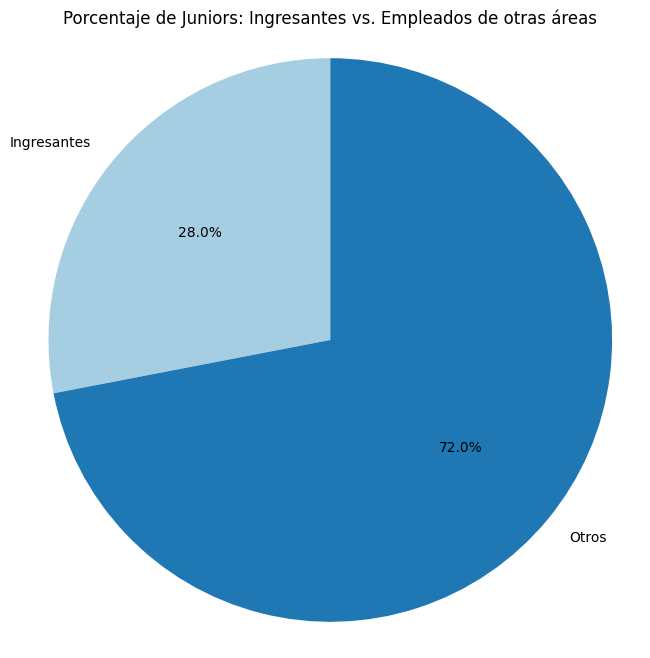

In [12]:

df_anos_de_experiencia = df_junior[df_junior['anos_de_experiencia'].notna()]

conteo_anos_de_experiencia_junior = df_anos_de_experiencia['anos_de_experiencia'].value_counts()

# Calcular el porcentaje relativo
conteo_anos_de_experiencia_junior_relativo = conteo_anos_de_experiencia_junior / len(df_anos_de_experiencia) * 100
print()
print(conteo_anos_de_experiencia_junior)
print()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 8))

# Crear el gráfico de torta
plt.pie(
    conteo_anos_de_experiencia_junior_relativo,
    labels=conteo_anos_de_experiencia_junior_relativo.index,
    autopct='%1.1f%%',  # Mostrar porcentajes con un decimal
    startangle=90,      # Iniciar el primer segmento a 90 grados
    colors=plt.cm.Paired.colors  # Colores predefinidos
)

# Añadir título
plt.title('Porcentaje de Juniors Según su Años de experiencia')

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

# ---
# Calcular cuántos de los juniors son nuevos ingresantes y cuantos ya trabajaban en la empresa antes de entrar en este puesto (mobilidad de puesto)

df_antiguedad_en_empresa_actual = df_anos_de_experiencia[df_anos_de_experiencia['antiguedad_en_la_empresa_actual'].notna()]

# Personas que ya trabajaban en el puesto actual, y las empresas los tomaron luego. (Lo contrario a mobilidad de puesto)
df_ingresantes = df_antiguedad_en_empresa_actual.query('anos_de_experiencia > antiguedad_en_la_empresa_actual')


# Calcular el porcentaje relativo.
# Use len(df_ingresantes) to get the number of ingresantes
# and divide by the total number of entries in df_antiguedad_en_empresa_actual
df_antiguedad_en_empresa_actual_relativo = (len(df_ingresantes) / len(df_antiguedad_en_empresa_actual)) * 100

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 8))

# Creating a pie chart using the calculated percentage
plt.pie(
    [df_antiguedad_en_empresa_actual_relativo, 100 - df_antiguedad_en_empresa_actual_relativo], # Data for the pie chart: percentage of ingresantes and the remaining percentage
    labels=['Ingresantes', 'Otros'], # Labels for the pie slices
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=90,      # Start the first segment at 90 degrees
    colors=plt.cm.Paired.colors  # Predefined colors
)

# Añadir título
plt.title('Porcentaje de Juniors: Ingresantes vs. Empleados de otras áreas')

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()


### Nivel Académico y Experiencia
Buscamos observar que tecnologías son las más utilizadas por los juniors que estan trabajando en el sector y tienen un nivel de estudio básico de secundario.

Como se observa en los gráficos, los lenguajes más utilizados por este segmento de juniors es el tridente de Javascript, HTML, CSS y SQL para manejo de DB.
Con respecto a librerias y frameworks lideran React, Node y Bootstrap.

En conclusión. El background de Javascript y SQL sigue siendo fundamental para insertarse en el sector IT.

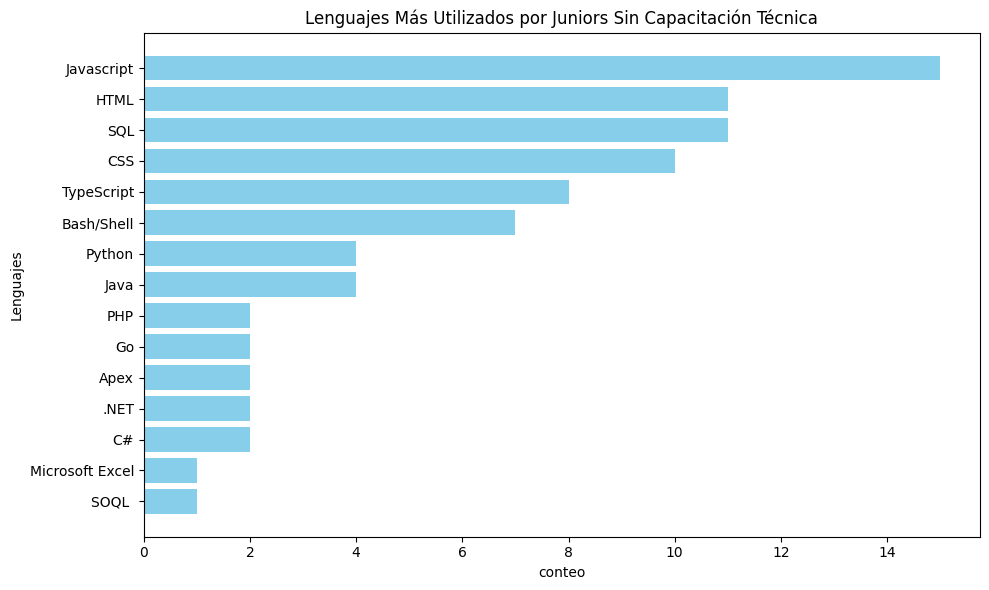

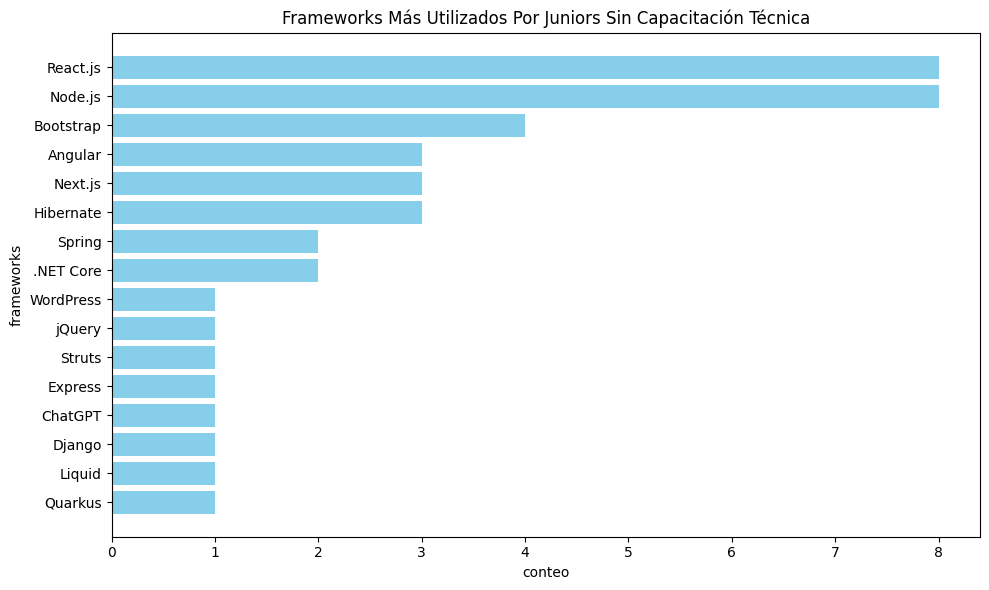

In [13]:
#filtramos los datos por seniority = junior y maximo nivel de estudios = secundario
data_filtrada = df[
    (df['seniority'] == 'Junior') &
    (df['maximo_nivel_de_estudios'] == 'Secundario')
][['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual',
   'frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual']]

# limpiamos datos de NaN y separamos los lenguajes y frameworks individualmente

lenguaje_filtrado = data_filtrada['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].dropna().str.split(', ')
framework_filtrado = data_filtrada['frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual'].dropna().str.split(', ')


lenguaje_counts = lenguaje_filtrado.explode('lenguajes').value_counts()
lenguaje_counts = lenguaje_counts.drop(lenguaje_counts.index[6])
framework_counts = framework_filtrado.explode('frameworks').value_counts()
framework_counts = framework_counts.drop(framework_counts.index[0])

#graficamos los lenguajes
plt.figure(figsize=(10, 6))
plt.barh(lenguaje_counts.index,lenguaje_counts.values, color='skyblue')
plt.title('Lenguajes Más Utilizados por Juniors Sin Capacitación Técnica')
plt.xlabel('conteo')
plt.ylabel('Lenguajes')
plt.gca().invert_yaxis()  # Invertir el eje Y

plt.tight_layout()
plt.show()

#graficamos los frameworks
plt.figure(figsize=(10, 6))
plt.barh(framework_counts.index,framework_counts.values, color='skyblue')
plt.title('Frameworks Más Utilizados Por Juniors Sin Capacitación Técnica')
plt.xlabel('conteo')
plt.ylabel('frameworks')
plt.gca().invert_yaxis()  # Invertir el eje Y

plt.tight_layout()
plt.show()

# Análisis de Beneficios y Condiciones Laborales

Este análisis busca explorar los beneficios ofrecidos a los profesionales IT en sus primeros años de carrera y cómo estos están relacionados con las habilidades y herramientas demandadas por el mercado. Aunque no se vinculan directamente con las exigencias del mercado actual, estos beneficios nos permiten dar mayor forma y contexto a nuestra hipótesis.

###Objetivo principal:
Entender qué beneficios suelen recibir los profesionales IT en posiciones junior, identificar patrones en las condiciones laborales, y relacionarlos con las herramientas y habilidades requeridas.


###¿A qué beneficios acceden los Juniors?

En esta sección, se analizarán tres columnas clave para entender el acceso a beneficios entre los profesionales IT encuestados:

1.`contas_con_beneficios_adicionales`
Contiene detalles sobre diversos beneficios adicionales, incluyendo aquellos que consideran la modalidad de trabajo remoto como un incentivo.

2.`modalidad_de_trabajo`
Permite identificar cuántos encuestados efectivamente trabajan bajo una modalidad remota, híbrida o presencial.

3.`recibis_algun_tipo_de_bono`
Indica si los trabajadores reciben bonificaciones económicas.

<ipython-input-14-2db246df54da>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'Salud_y_Bienestar'] = df_junior[columna_beneficios].str.lower().str.contains('prepaga|obra|social|swiss|osde|jerarquicos|asistencia|psico|guarder|gim')
<ipython-input-14-2db246df54da>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'Beneficios_Monetarios'] = df_junior[columna_beneficios].str.lower().str.contains('bono|incentivo|giftcard|reintegro|prestamos|prestamo|préstamo|canje|pago|regalos


Cantidad de Juniors con Beneficios por Categoría:
Salud_y_Bienestar            390
Beneficios_Monetarios        663
Flexibilidad_y_Horarios      583
Formacion_y_Capacitacion     680
Abonos_y_Servicios           418
Transporte                    63
Licencias                    322
Alimentacion                 214
Tiempo_Libre_y_Recreacion      6
Club_y_Membresias              3
dtype: int64



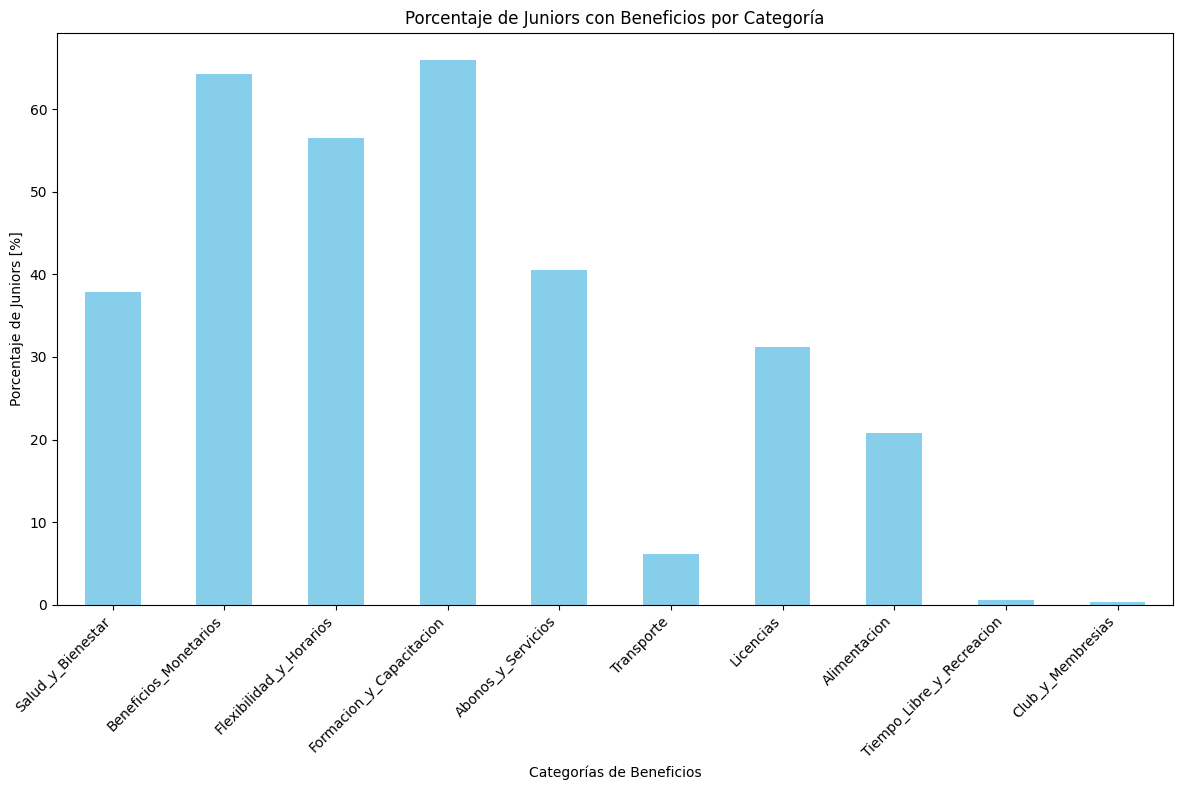

In [14]:
# Punto 1:

# Definir la columna de beneficios
columna_beneficios = 'contas_con_beneficios_adicionales'

# Crear columnas para cada categoría en df_junior
df_junior.loc[:, 'Salud_y_Bienestar'] = df_junior[columna_beneficios].str.lower().str.contains('prepaga|obra|social|swiss|osde|jerarquicos|asistencia|psico|guarder|gim')
df_junior.loc[:, 'Beneficios_Monetarios'] = df_junior[columna_beneficios].str.lower().str.contains('bono|incentivo|giftcard|reintegro|prestamos|prestamo|préstamo|canje|pago|regalos|iva|IVA|credito|crédito|descuento|uss|USS|K|k|dolares|dólares|descuento|adelanto|alquiler|vivienda|mudanza|billetera|virtual|paga')
df_junior.loc[:, 'Flexibilidad_y_Horarios'] = df_junior[columna_beneficios].str.lower().str.contains('jornada|reducida|flex|ilimitad|off')
df_junior.loc[:, 'Formacion_y_Capacitacion'] = df_junior[columna_beneficios].str.lower().str.contains('clases|cursos|certificacion|congreso|team work|cowork|teamwork|webinar|universidad|capacitaci|posgrado|estudio')
df_junior.loc[:, 'Abonos_y_Servicios'] = df_junior[columna_beneficios].str.lower().str.contains('luz|electricidad|internet|celular')
df_junior.loc[:, 'Transporte'] = df_junior[columna_beneficios].str.lower().str.contains('cabify|nafta|combustible|peaje|combi|traslado|auto|estacionamiento')
df_junior.loc[:, 'Licencias'] = df_junior[columna_beneficios].str.lower().str.contains('nacimiento|vacaciones')
df_junior.loc[:, 'Alimentacion'] = df_junior[columna_beneficios].str.lower().str.contains('café|snacks|asado|comida|mercado|bebida|pedido|cerveza')
df_junior.loc[:, 'Tiempo_Libre_y_Recreacion'] = df_junior[columna_beneficios].str.lower().str.contains('cumpleaños|libre|deport|merchandasing|recreativo')
df_junior.loc[:, 'Club_y_Membresias'] = df_junior[columna_beneficios].str.lower().str.contains('Club La Nación|Nacion|Unilever|beneficios')

# Contar cuántos Juniors tienen beneficios en cada categoría
conteo_beneficios_junior = df_junior.iloc[:, -10:].sum()

#en relativo
conteo_beneficios_junior_relativo = conteo_beneficios_junior / len(df_junior) * 100

# Mostrar los resultados
print()
print("Cantidad de Juniors con Beneficios por Categoría:")
print(conteo_beneficios_junior)
print()

# Graficar los resultados

conteo_beneficios_junior_relativo.plot(kind='bar', color='skyblue', figsize=(12, 8))
plt.title('Porcentaje de Juniors con Beneficios por Categoría')
plt.ylabel('Porcentaje de Juniors [%]')
plt.xlabel('Categorías de Beneficios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





modalidad_de_trabajo
100% remoto                      578
Híbrido (presencial y remoto)    389
100% presencial                   64
Name: count, dtype: int64



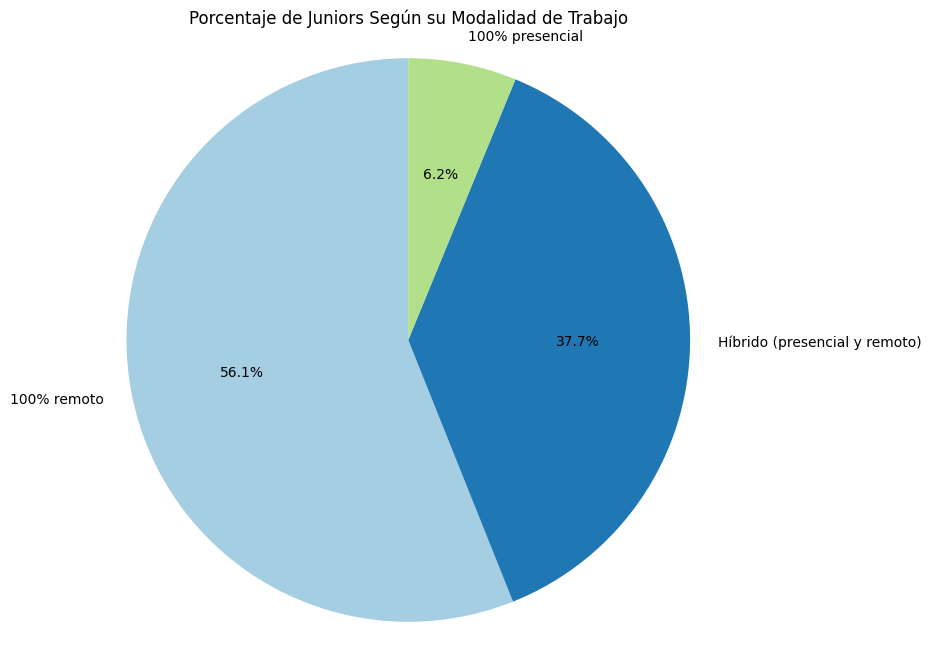

In [15]:
#Punto 2:
df_modalidad_de_trabajo = df_junior[df_junior['modalidad_de_trabajo'].notna()]

conteo_modalidad_trabajo_junior = df_modalidad_de_trabajo['modalidad_de_trabajo'].value_counts()

# Calcular el porcentaje relativo
conteo_modalidad_trabajo_junior_relativo = conteo_modalidad_trabajo_junior / len(df_modalidad_de_trabajo) * 100
print()
print(conteo_modalidad_trabajo_junior)
print()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 8))

# Crear el gráfico de torta
plt.pie(
    conteo_modalidad_trabajo_junior_relativo,
    labels=conteo_modalidad_trabajo_junior_relativo.index,
    autopct='%1.1f%%',  # Mostrar porcentajes con un decimal
    startangle=90,      # Iniciar el primer segmento a 90 grados
    colors=plt.cm.Paired.colors  # Colores predefinidos
)

# Añadir título
plt.title('Porcentaje de Juniors Según su Modalidad de Trabajo')

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()


recibis_algun_tipo_de_bono
No                       697
Menos de un sueldo       147
Un sueldo                106
De uno a tres sueldos     77
3+ sueldos                 4
Name: count, dtype: int64



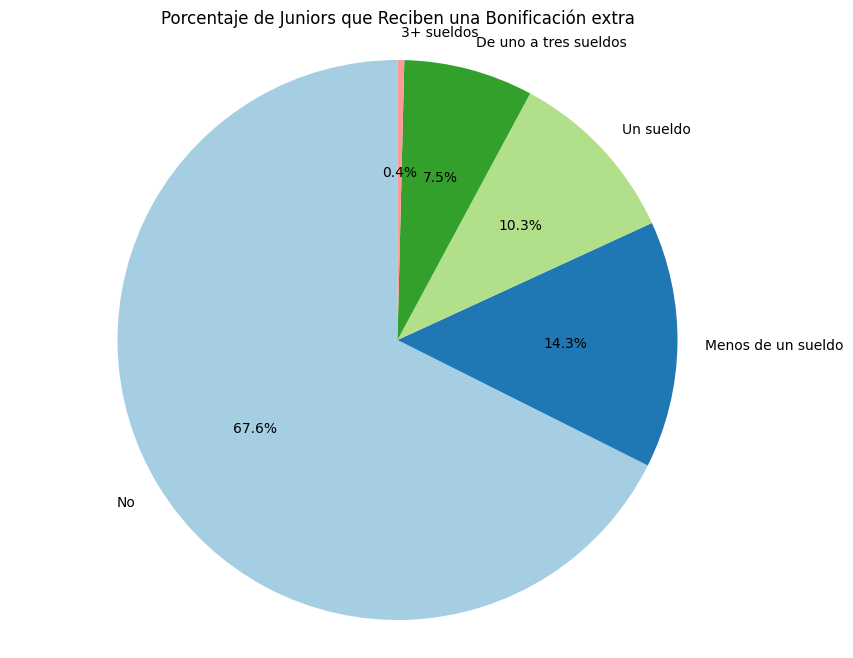

In [16]:
#Punto 3:
df_junior_bonificado = df_junior[df_junior['recibis_algun_tipo_de_bono'].notna()]

conteo_df_junior_bonificado = df_junior_bonificado['recibis_algun_tipo_de_bono'].value_counts()

# Calcular el porcentaje relativo
conteo_df_junior_bonificado_relativo = conteo_df_junior_bonificado / len(df_junior_bonificado) * 100
print()
print(conteo_df_junior_bonificado )
print()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el gráfico de torta
plt.pie(
    conteo_df_junior_bonificado_relativo,
    labels=conteo_df_junior_bonificado_relativo.index,
    autopct='%1.1f%%',  # Mostrar porcentajes con un decimal
    startangle=90,
    colors=plt.cm.Paired.colors  # Colores predefinidos
)

plt.title('Porcentaje de Juniors que Reciben una Bonificación extra')
plt.axis('equal')
plt.show()

###¿Existen diferencias en los beneficios según la moneda en que se percibe el salario?

En esta sección, exploraremos si existen diferencias significativas en los beneficios adicionales que reciben los profesionales IT Junior según la moneda en que perciben su salario, comparando aquellos que ganan en pesos argentinos con quienes reciben su `sueldo_dolarizado`. Aunque no podemos determinar directamente si estos últimos trabajan para empresas extranjeras, la percepción de sueldos en moneda extranjera podría estar vinculada a un contexto laboral diferente,posiblemente asociado a mayor estabilidad monetaria.

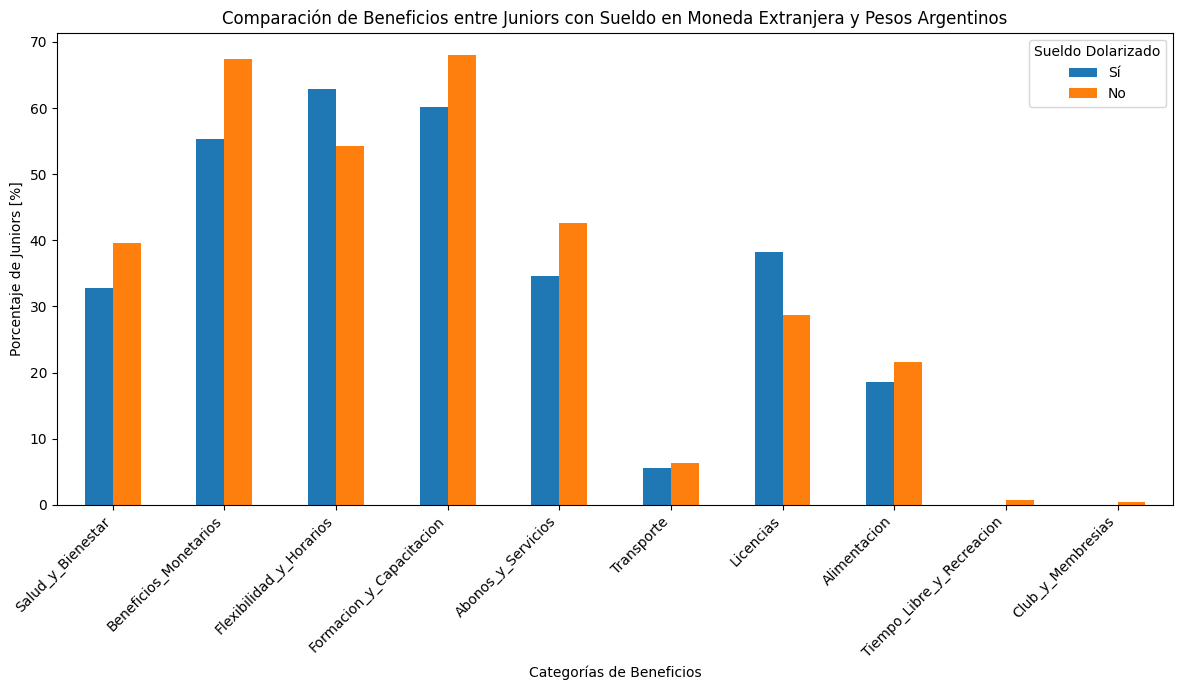

In [17]:
df_junior_moneda_extranjera = df_junior[df_junior['sueldo_dolarizado']== True]
df_junior_pesos_argentinos = df_junior[df_junior['sueldo_dolarizado']== False]

columnas_beneficios = [
    'Salud_y_Bienestar', 'Beneficios_Monetarios', 'Flexibilidad_y_Horarios',
    'Formacion_y_Capacitacion', 'Abonos_y_Servicios', 'Transporte',
    'Licencias', 'Alimentacion', 'Tiempo_Libre_y_Recreacion', 'Club_y_Membresias'
]


if not df_junior_moneda_extranjera.empty:
    proporcion_beneficios_moneda_extranjera = df_junior_moneda_extranjera[columnas_beneficios].mean() * 100
else:
    print("Advertencia: No hay datos para desarrolladores con sueldo en moneda extranjera.")
    proporcion_beneficios_moneda_extranjera = pd.Series([0] * len(columnas_beneficios), index=columnas_beneficios)

if not df_junior_pesos_argentinos.empty:
    proporcion_beneficios_pesos_argentinos = df_junior_pesos_argentinos[columnas_beneficios].mean() * 100
else:
    print("Advertencia: No hay datos para desarrolladores con sueldo en pesos argentinos.")
    proporcion_beneficios_pesos_argentinos = pd.Series([0] * len(columnas_beneficios), index=columnas_beneficios)


comparacion_beneficios = pd.DataFrame({
    'Sí': proporcion_beneficios_moneda_extranjera,
    'No': proporcion_beneficios_pesos_argentinos
})

comparacion_beneficios['Diferencia'] = comparacion_beneficios['Sí'] - comparacion_beneficios['No']


comparacion_beneficios[['Sí', 'No']].plot(kind='bar', figsize=(12, 7))
plt.title('Comparación de Beneficios entre Juniors con Sueldo en Moneda Extranjera y Pesos Argentinos')
plt.ylabel('Porcentaje de Juniors [%]')
plt.xlabel('Categorías de Beneficios')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sueldo Dolarizado')
plt.tight_layout()
plt.show()



###Relación entre tecnologías, lenguajes, plataformas y el acceso a los beneficios más frecuentes

Habiendo explorado los datos sobre los beneficios y su acceso para diferentes trabajadores Junior, pasamos a examinar las condiciones previas necesarias para que un futuro empleado o estudiante pueda acceder a estas ventajas a través de la empleabilidad. Este análisis se enfoca en las herramientas y conocimientos que el mercado laboral demanda actualmente.

Para ello, exploraremos cuatro columnas clave:

1.`lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual`, para identificar los lenguajes más utilizados en el sector.\
2.`plataformas_que_utilizas_en_tu_puesto_actual`, que detalla los entornos o sistemas sobre los que trabajan los profesionales.\
3.`frameworks_herramientas_y_librerias_que_utilices_en_tu_puesto_actual`, para analizar las herramientas específicas que soportan el desarrollo y la productividad.\
4.`bases_de_datos`, para entender qué sistemas de gestión de datos son más demandados.

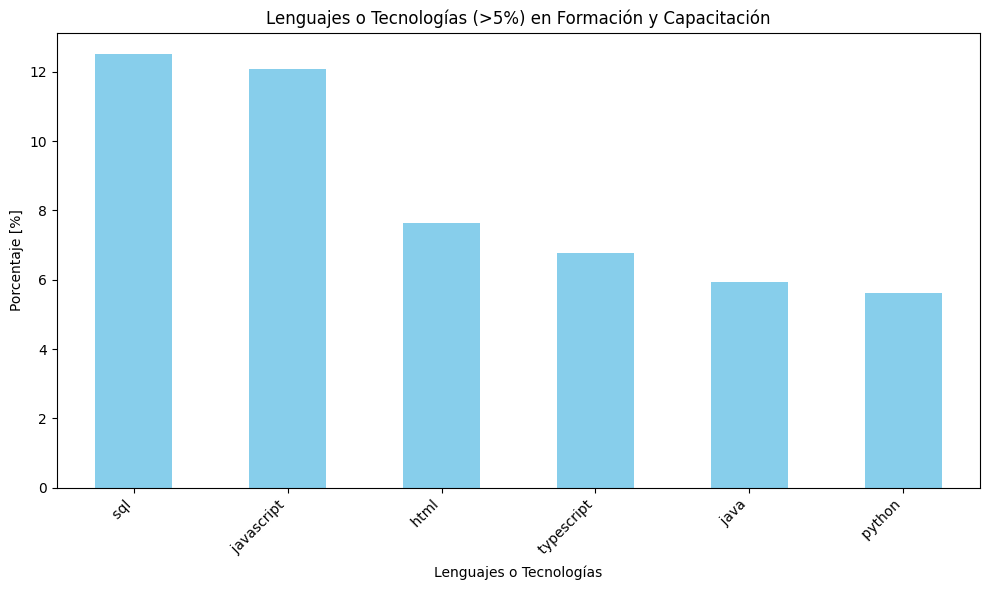

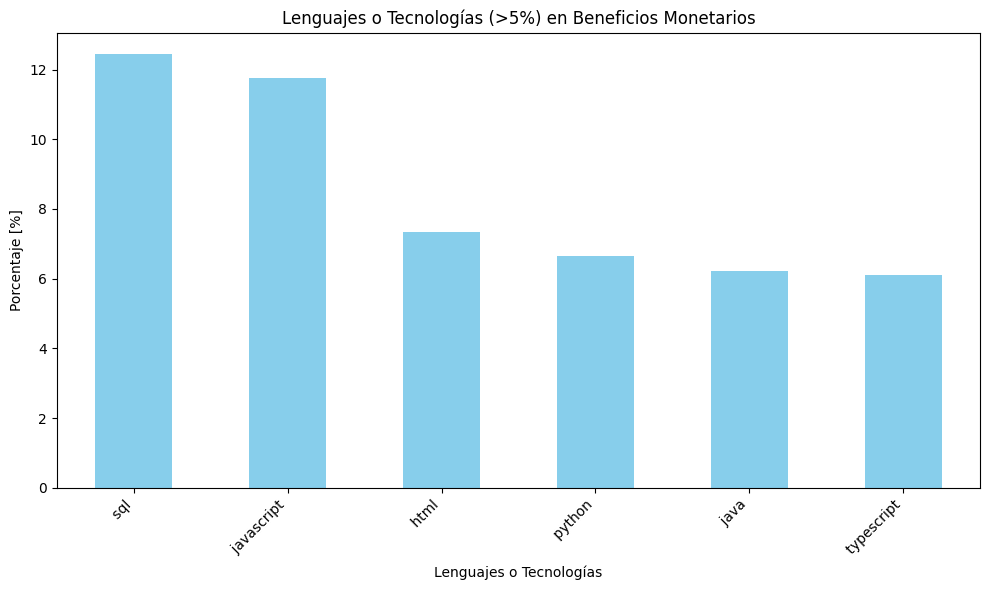

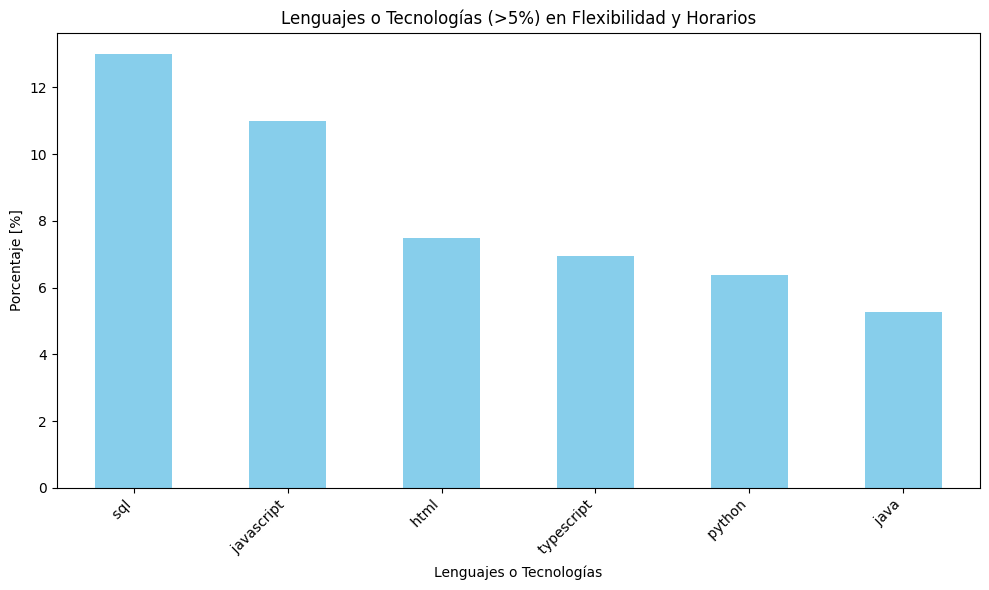

In [18]:
#Punto 1.

df_lenguajes_tecnologias_beneficios = df_junior.copy()

# Llenar valores faltantes y transformar las plataformas
df_lenguajes_tecnologias_beneficios['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'] = df_lenguajes_tecnologias_beneficios['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].fillna('')
df_lenguajes_tecnologias_beneficios['lenguajes_o_tecnologias_normalizadas'] = df_lenguajes_tecnologias_beneficios['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].str.lower().str.strip()
df_lenguajes_tecnologias_beneficios['lenguajes_o_tecnologias_separadas'] = df_lenguajes_tecnologias_beneficios['lenguajes_o_tecnologias_normalizadas'].str.split(',')

# Explode para crear filas individuales por plataforma
df_lenguajes_tecnologias_beneficios = df_lenguajes_tecnologias_beneficios.explode('lenguajes_o_tecnologias_separadas').copy()
df_lenguajes_tecnologias_beneficios.rename(columns={'lenguajes_o_tecnologias_separadas': 'lenguajes_o_tecnologias_beneficios'}, inplace=True)

# Filtrar plataformas irrelevantes
df_lenguajes_tecnologias_beneficios = df_lenguajes_tecnologias_beneficios[df_lenguajes_tecnologias_beneficios['lenguajes_o_tecnologias_beneficios'] != 'ninguno de los anteriores']

# Eliminar duplicados antes de contar
df_lenguajes_tecnologias_beneficios = df_lenguajes_tecnologias_beneficios.drop_duplicates(subset=['lenguajes_o_tecnologias_beneficios', 'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'])

# Crear una función para calcular y graficar porcentajes por beneficios
def calcular_y_graficar_beneficio(df_lenguajes_tecnologias_beneficios, columna_beneficio, titulo_grafico, porcentaje_minimo=5):
    # Filtrar registros donde se recibe el beneficio
    df_beneficio = df_lenguajes_tecnologias_beneficios[df_lenguajes_tecnologias_beneficios[columna_beneficio]]

    # Contar plataformas y calcular porcentajes
    conteo_beneficio = df_beneficio['lenguajes_o_tecnologias_beneficios'].value_counts()
    porcentaje_beneficio = (conteo_beneficio / conteo_beneficio.sum()) * 100

    # Filtrar plataformas con porcentaje mayor al umbral
    porcentaje_beneficio_filtrado = porcentaje_beneficio[porcentaje_beneficio > porcentaje_minimo]

    # Graficar
    plt.figure(figsize=(10, 6))
    porcentaje_beneficio_filtrado.plot(kind='bar', color='skyblue')
    plt.title(titulo_grafico)
    plt.ylabel('Porcentaje [%]')
    plt.xlabel('Lenguajes o Tecnologías')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Graficar plataformas según los beneficios
calcular_y_graficar_beneficio(df_lenguajes_tecnologias_beneficios, 'Formacion_y_Capacitacion', 'Lenguajes o Tecnologías (>5%) en Formación y Capacitación')
calcular_y_graficar_beneficio(df_lenguajes_tecnologias_beneficios, 'Beneficios_Monetarios', 'Lenguajes o Tecnologías (>5%) en Beneficios Monetarios')
calcular_y_graficar_beneficio(df_lenguajes_tecnologias_beneficios, 'Flexibilidad_y_Horarios', 'Lenguajes o Tecnologías (>5%) en Flexibilidad y Horarios')


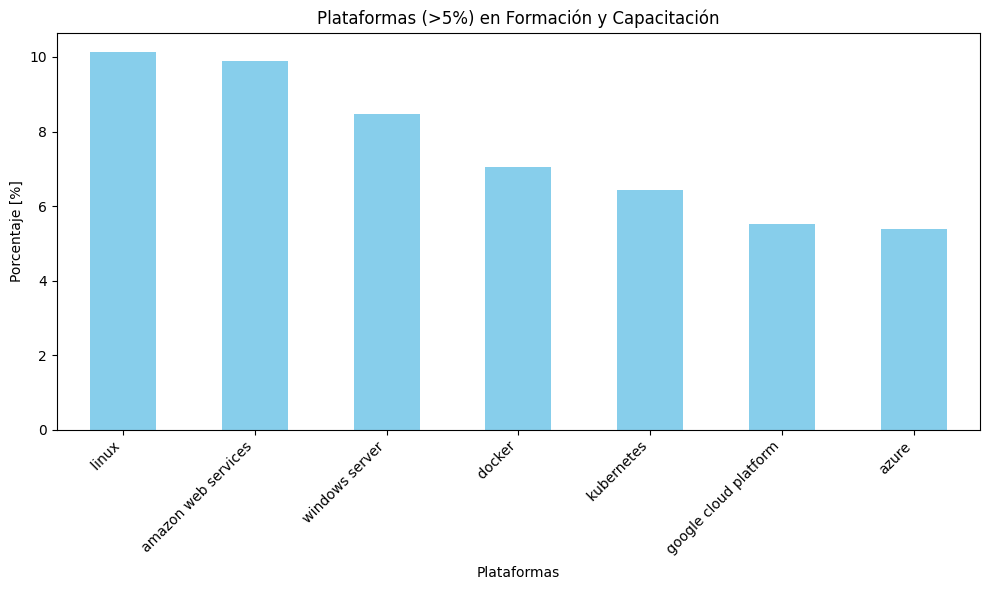

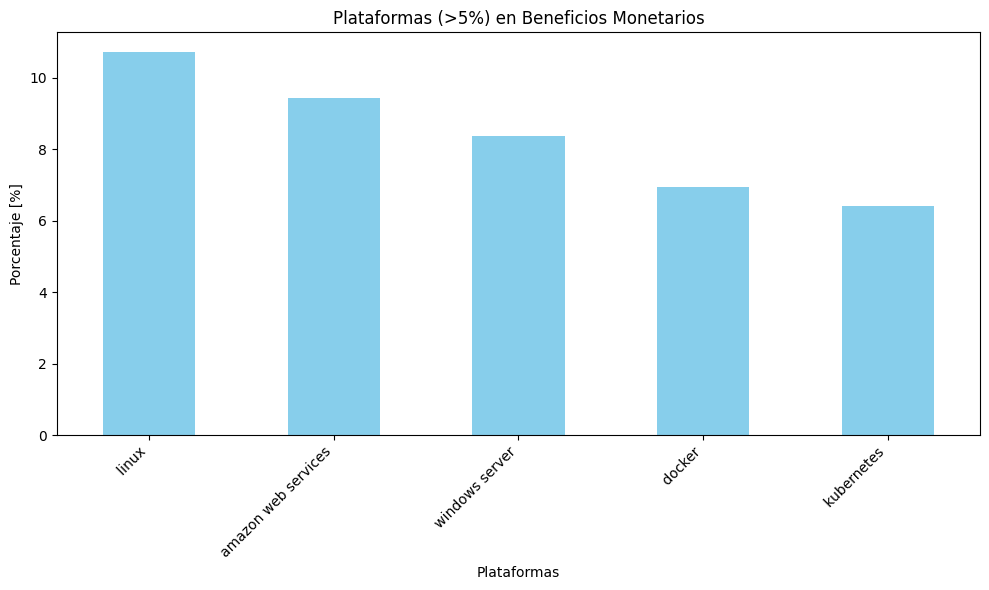

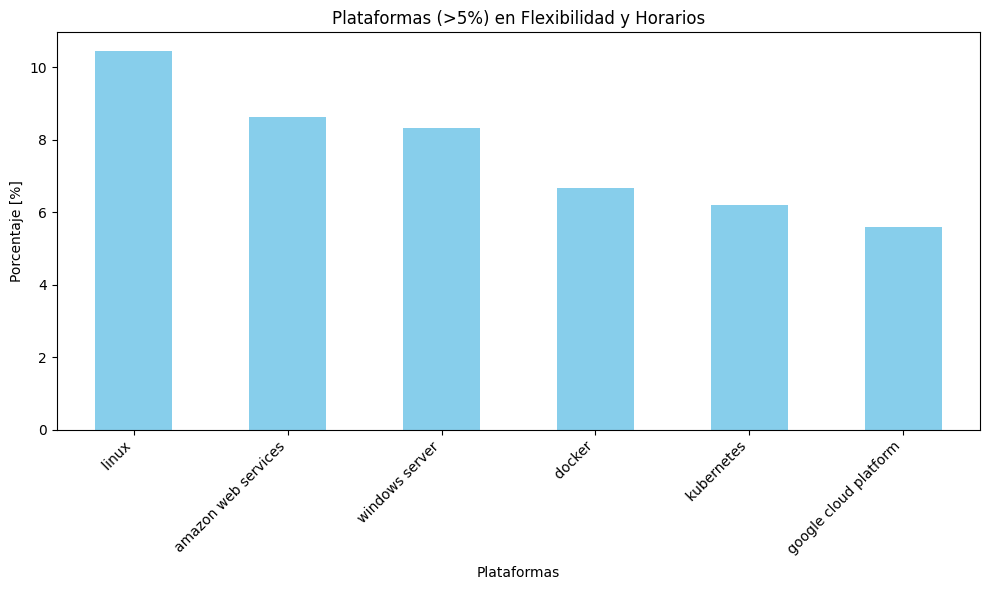

In [19]:
#Punto 2:

df_plataformas_beneficios = df_junior.copy()

# Llenar valores faltantes y transformar las plataformas
df_plataformas_beneficios['plataformas_que_utilizas_en_tu_puesto_actual'] = df_plataformas_beneficios['plataformas_que_utilizas_en_tu_puesto_actual'].fillna('')
df_plataformas_beneficios['plataformas_normalizadas'] = df_plataformas_beneficios['plataformas_que_utilizas_en_tu_puesto_actual'].str.lower().str.strip()
df_plataformas_beneficios['plataformas_separadas'] = df_plataformas_beneficios['plataformas_normalizadas'].str.split(',')

# Explode para crear filas individuales por plataforma
df_plataformas_beneficios = df_plataformas_beneficios.explode('plataformas_separadas').copy()
df_plataformas_beneficios.rename(columns={'plataformas_separadas': 'plataformas'}, inplace=True)

# Filtrar plataformas irrelevantes
df_plataformas_beneficios = df_plataformas_beneficios[df_plataformas_beneficios['plataformas'] != 'ninguna de las anteriores']

# Eliminar duplicados antes de contar
df_plataformas_beneficios = df_plataformas_beneficios.drop_duplicates(subset=['plataformas', 'plataformas_que_utilizas_en_tu_puesto_actual'])

# Crear una función para calcular y graficar porcentajes por beneficios
def calcular_y_graficar_beneficio(df_plataformas_beneficios, columna_beneficio, titulo_grafico, porcentaje_minimo=5):
    # Filtrar registros donde se recibe el beneficio
    df_beneficio = df_plataformas_beneficios[df_plataformas_beneficios[columna_beneficio]]

    # Contar plataformas y calcular porcentajes
    conteo_beneficio = df_beneficio['plataformas'].value_counts()
    porcentaje_beneficio = (conteo_beneficio / conteo_beneficio.sum()) * 100

    # Filtrar plataformas con porcentaje mayor al umbral
    porcentaje_beneficio_filtrado = porcentaje_beneficio[porcentaje_beneficio > porcentaje_minimo]

    # Graficar
    plt.figure(figsize=(10, 6))
    porcentaje_beneficio_filtrado.plot(kind='bar', color='skyblue')
    plt.title(titulo_grafico)
    plt.ylabel('Porcentaje [%]')
    plt.xlabel('Plataformas')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Graficar plataformas según los beneficios
calcular_y_graficar_beneficio(df_plataformas_beneficios, 'Formacion_y_Capacitacion', 'Plataformas (>5%) en Formación y Capacitación')
calcular_y_graficar_beneficio(df_plataformas_beneficios, 'Beneficios_Monetarios', 'Plataformas (>5%) en Beneficios Monetarios')
calcular_y_graficar_beneficio(df_plataformas_beneficios, 'Flexibilidad_y_Horarios', 'Plataformas (>5%) en Flexibilidad y Horarios')



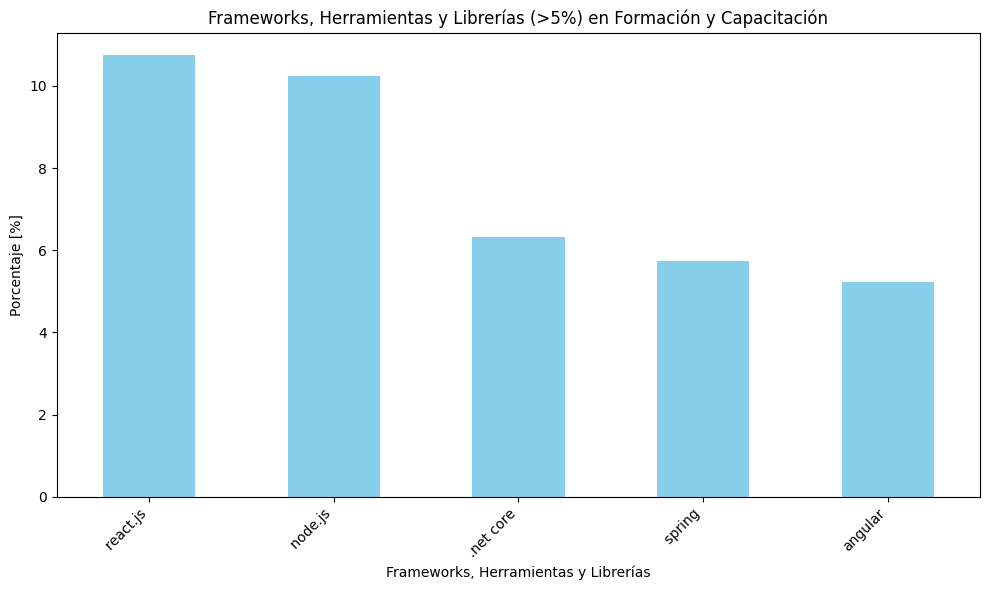

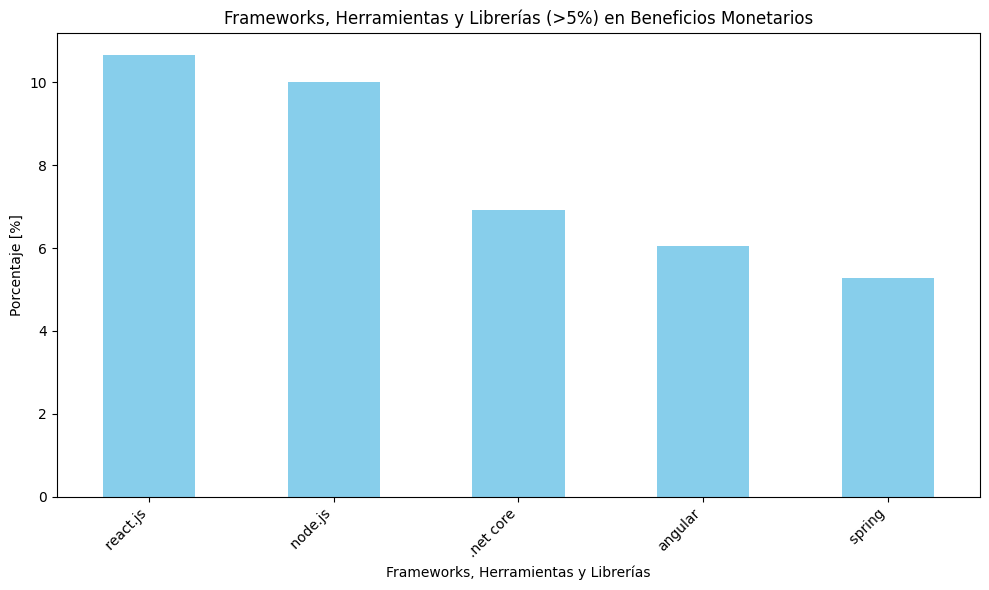

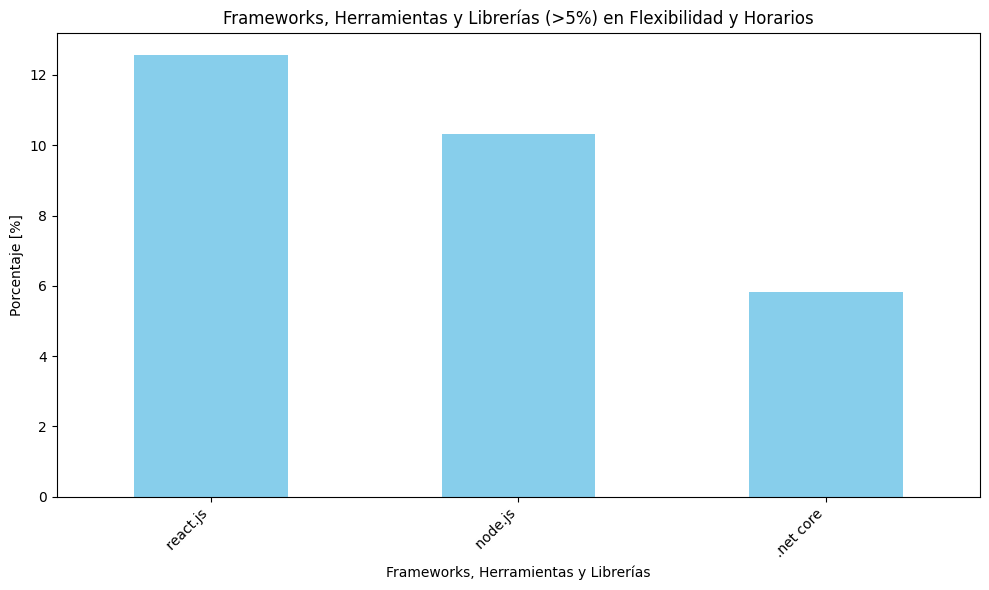

In [20]:
#Punto 3:

df_frameworks_herramientas_y_librerias_beneficios = df_junior.copy()

# Llenar valores faltantes y transformar las plataformas
df_frameworks_herramientas_y_librerias_beneficios['frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual'] = df_frameworks_herramientas_y_librerias_beneficios['frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual'].fillna('')
df_frameworks_herramientas_y_librerias_beneficios['frameworks_herramientas_librerias_normalizadas'] = df_frameworks_herramientas_y_librerias_beneficios['frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual'].str.lower().str.strip()
df_frameworks_herramientas_y_librerias_beneficios['frameworks_herramientas_librerias_separadas'] = df_frameworks_herramientas_y_librerias_beneficios['frameworks_herramientas_librerias_normalizadas'].str.split(',')

# Explode para crear filas individuales por plataforma
df_frameworks_herramientas_y_librerias_beneficios = df_frameworks_herramientas_y_librerias_beneficios.explode('frameworks_herramientas_librerias_separadas').copy()
df_frameworks_herramientas_y_librerias_beneficios.rename(columns={'frameworks_herramientas_librerias_separadas': 'frameworks_herramientas_librerias_beneficios'}, inplace=True)

# Filtrar plataformas irrelevantes
df_frameworks_herramientas_y_librerias_beneficios = df_frameworks_herramientas_y_librerias_beneficios[df_frameworks_herramientas_y_librerias_beneficios['frameworks_herramientas_librerias_beneficios'] != 'ninguno de los anteriores']

# Crear una función para calcular y graficar porcentajes por beneficios
def calcular_y_graficar_beneficio(df_frameworks_herramientas_y_librerias_beneficios, columna_beneficio, titulo_grafico, porcentaje_minimo=5):
    # Filtrar registros donde se recibe el beneficio
    df_beneficio = df_frameworks_herramientas_y_librerias_beneficios[df_frameworks_herramientas_y_librerias_beneficios[columna_beneficio]]

    # Contar plataformas y calcular porcentajes
    conteo_beneficio = df_beneficio['frameworks_herramientas_librerias_beneficios'].value_counts()
    porcentaje_beneficio = (conteo_beneficio / conteo_beneficio.sum()) * 100

    # Filtrar plataformas con porcentaje mayor al umbral
    porcentaje_beneficio_filtrado = porcentaje_beneficio[porcentaje_beneficio > porcentaje_minimo]

    # Graficar
    plt.figure(figsize=(10, 6))
    porcentaje_beneficio_filtrado.plot(kind='bar', color='skyblue')
    plt.title(titulo_grafico)
    plt.ylabel('Porcentaje [%]')
    plt.xlabel('Frameworks, Herramientas y Librerías')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Graficar plataformas según los beneficios
calcular_y_graficar_beneficio(df_frameworks_herramientas_y_librerias_beneficios, 'Formacion_y_Capacitacion', 'Frameworks, Herramientas y Librerías (>5%) en Formación y Capacitación')
calcular_y_graficar_beneficio(df_frameworks_herramientas_y_librerias_beneficios, 'Beneficios_Monetarios', 'Frameworks, Herramientas y Librerías (>5%) en Beneficios Monetarios')
calcular_y_graficar_beneficio(df_frameworks_herramientas_y_librerias_beneficios, 'Flexibilidad_y_Horarios', 'Frameworks, Herramientas y Librerías (>5%) en Flexibilidad y Horarios')

<ipython-input-21-835f98211cfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'bases_de_datos_normalizadas']= df_junior['bases_de_datos'].str.lower().str.strip()
<ipython-input-21-835f98211cfd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junior.loc[:, 'bases_de_datos_separadas']= df_junior['bases_de_datos_normalizadas'].str.split(',')


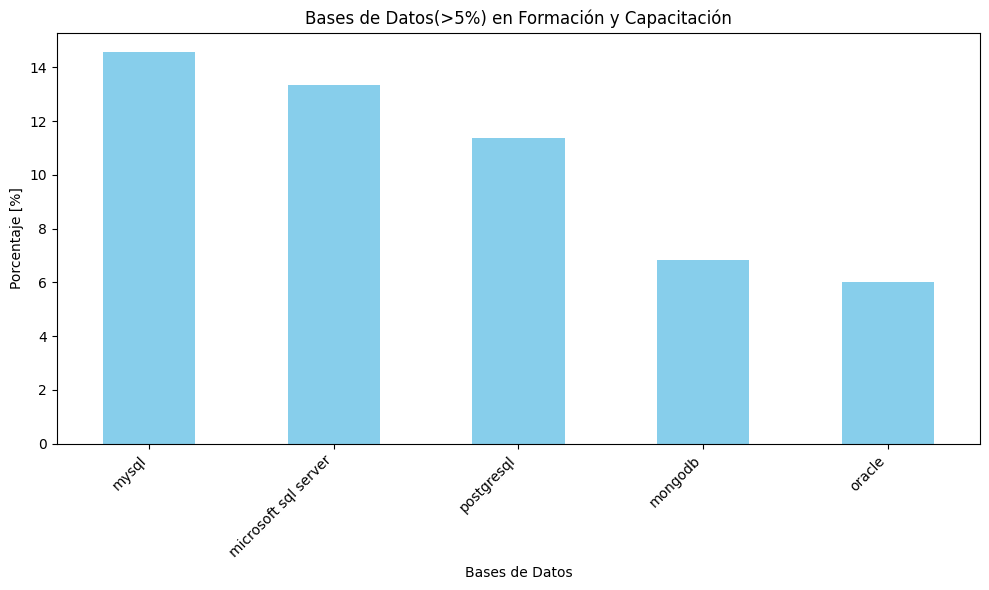

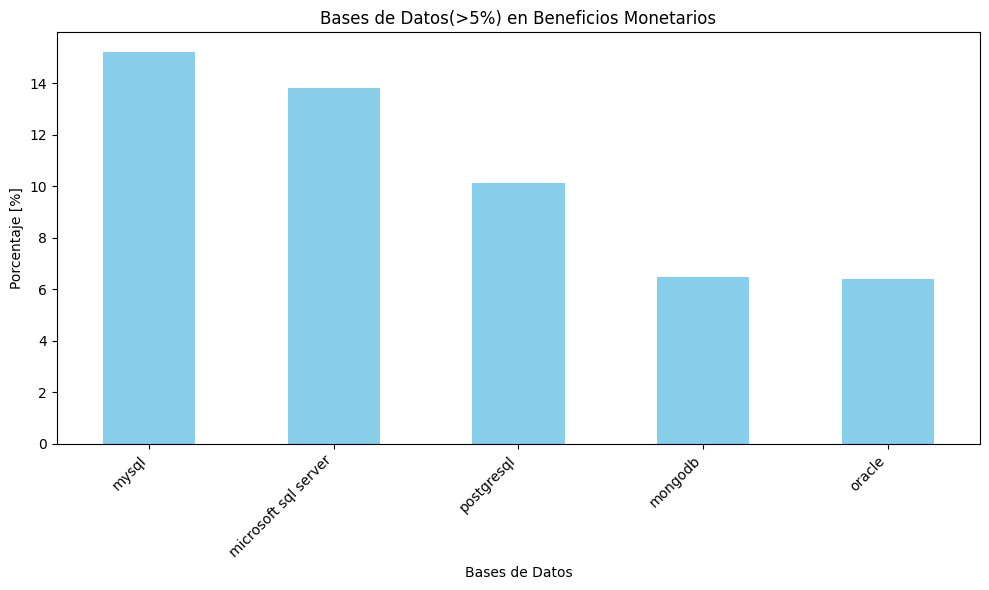

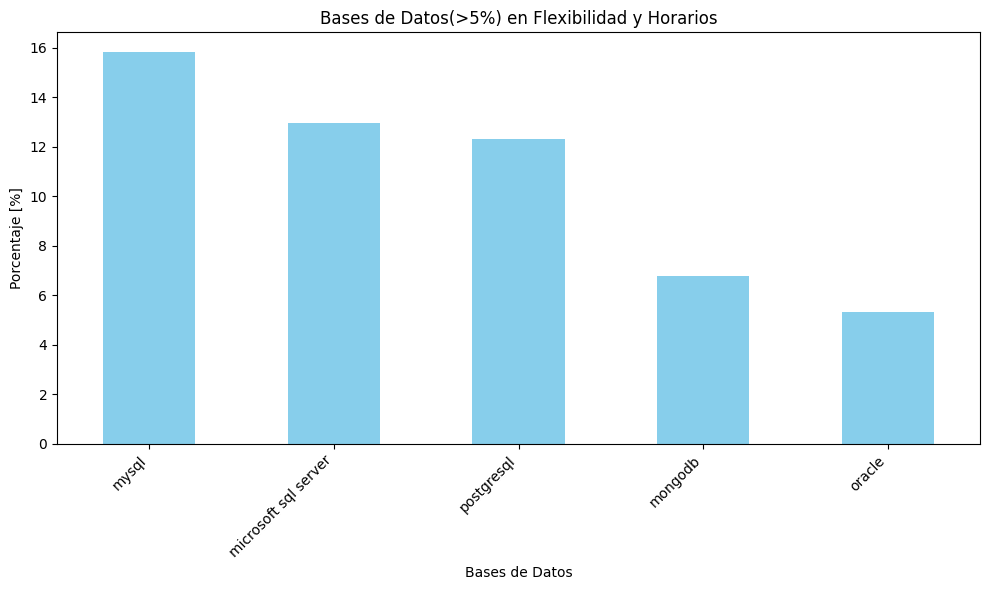

In [21]:
#Punto 4:
df_junior.loc[:, 'bases_de_datos'] = df_junior['bases_de_datos'].fillna('')

df_junior.loc[:, 'bases_de_datos_normalizadas']= df_junior['bases_de_datos'].str.lower().str.strip()

df_junior.loc[:, 'bases_de_datos_separadas']= df_junior['bases_de_datos_normalizadas'].str.split(',')

df_junior.loc[:, 'bases_de_datos_separadas']=df_junior['bases_de_datos_separadas'].apply(lambda x: [item.strip() for item in x])

df_bases_de_datos = df_junior.explode('bases_de_datos_separadas')

df_bases_de_datos = df_bases_de_datos.rename(columns={'bases_de_datos_separadas':'base_de_datos_'})

df_bases_de_datos = df_bases_de_datos[df_bases_de_datos ['base_de_datos_'] != 'ninguna de las anteriores']

# Filtrar los registros donde se recibe el beneficio de Formación y Capacitación
df_formacion = df_bases_de_datos [df_bases_de_datos['Formacion_y_Capacitacion']]
conteo_formacion = df_formacion['base_de_datos_'].value_counts()
porcentaje_formacion = (conteo_formacion / conteo_formacion.sum()) * 100
porcentaje_formacion_filtrado = porcentaje_formacion[porcentaje_formacion > 5]

# Filtrar los registros donde se recibe el beneficio de Beneficios Monetarios
df_beneficios_monetarios = df_bases_de_datos[df_bases_de_datos['Beneficios_Monetarios']]
conteo_beneficios_monetarios = df_beneficios_monetarios['base_de_datos_'].value_counts()
porcentaje_beneficios_monetarios = (conteo_beneficios_monetarios / conteo_beneficios_monetarios.sum()) * 100
porcentaje_beneficios_monetarios_filtrado = porcentaje_beneficios_monetarios[porcentaje_beneficios_monetarios > 5]

# Filtrar los registros donde se recibe el beneficio de Flexibilidad y Horarios
df_flexibilidad = df_bases_de_datos[df_bases_de_datos['Flexibilidad_y_Horarios']]
conteo_flexibilidad =  df_bases_de_datos['base_de_datos_'].value_counts()
porcentaje_flexibilidad = (conteo_flexibilidad / conteo_flexibilidad.sum()) * 100
porcentaje_flexibilidad_filtrado = porcentaje_flexibilidad[porcentaje_flexibilidad > 5]

def graficar_porcentaje_filtrado(porcentaje, titulo):
    plt.figure(figsize=(10, 6))
    porcentaje.plot(kind='bar', color='skyblue')
    plt.title(titulo)
    plt.ylabel('Porcentaje [%]')
    plt.xlabel('Bases de Datos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Graficar Formación y Capacitación
graficar_porcentaje_filtrado(porcentaje_formacion_filtrado, 'Bases de Datos(>5%) en Formación y Capacitación')

# Graficar Beneficios Monetarios
graficar_porcentaje_filtrado(porcentaje_beneficios_monetarios_filtrado, 'Bases de Datos(>5%) en Beneficios Monetarios')

# Graficar Flexibilidad y Horarios
graficar_porcentaje_filtrado(porcentaje_flexibilidad_filtrado, 'Bases de Datos(>5%) en Flexibilidad y Horarios')

#Análisis de Salarios y Variables Relacionadas

Este análisis busca explorar los rangos salariales promedio de los profesionales IT en posiciones Junior y determinar si existen patrones significativos que relacionen el salario con variables clave como tecnologías utilizadas, años de experiencia y el nivel académico alcanzado.

###Objetivo principal
Determinar los factores que más influyen en los salarios de los profesionales IT Junior y evaluar cómo el contexto laboral y las habilidades técnicas impactan directamente en los ingresos percibidos.

##Estimación de Rangos Salariales Promedio para Profesionales Junior

En esta sección, se analizarán las siguientes columnas clave para estimar los rangos salariales promedio de los profesionales IT en posiciones Junior, considerando además la variable de género:

`ultimo_salario_mensual_o_retiro_bruto` y `ultimo_salario_mensual_neto`\
Estas columnas contienen la información principal sobre los ingresos mensuales de los encuestados, que se utilizarán para calcular rangos salariales promedio.

`genero`\
Se analizarán las diferencias salariales entre los géneros mayoritarios reportados: Hombre cis y Mujer cis.

<ipython-input-22-2584eeeb598f>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  seniority_filtrado = genero_filtrado[df['seniority'].isin(['Junior'])]



Promedio de salarios por género:
       genero  ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos  \
0  Hombre Cis                                       1.163354e+06           
1   Mujer Cis                                       1.102418e+06           

   ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos  
0                                      997586.932457         
1                                      942864.503604         



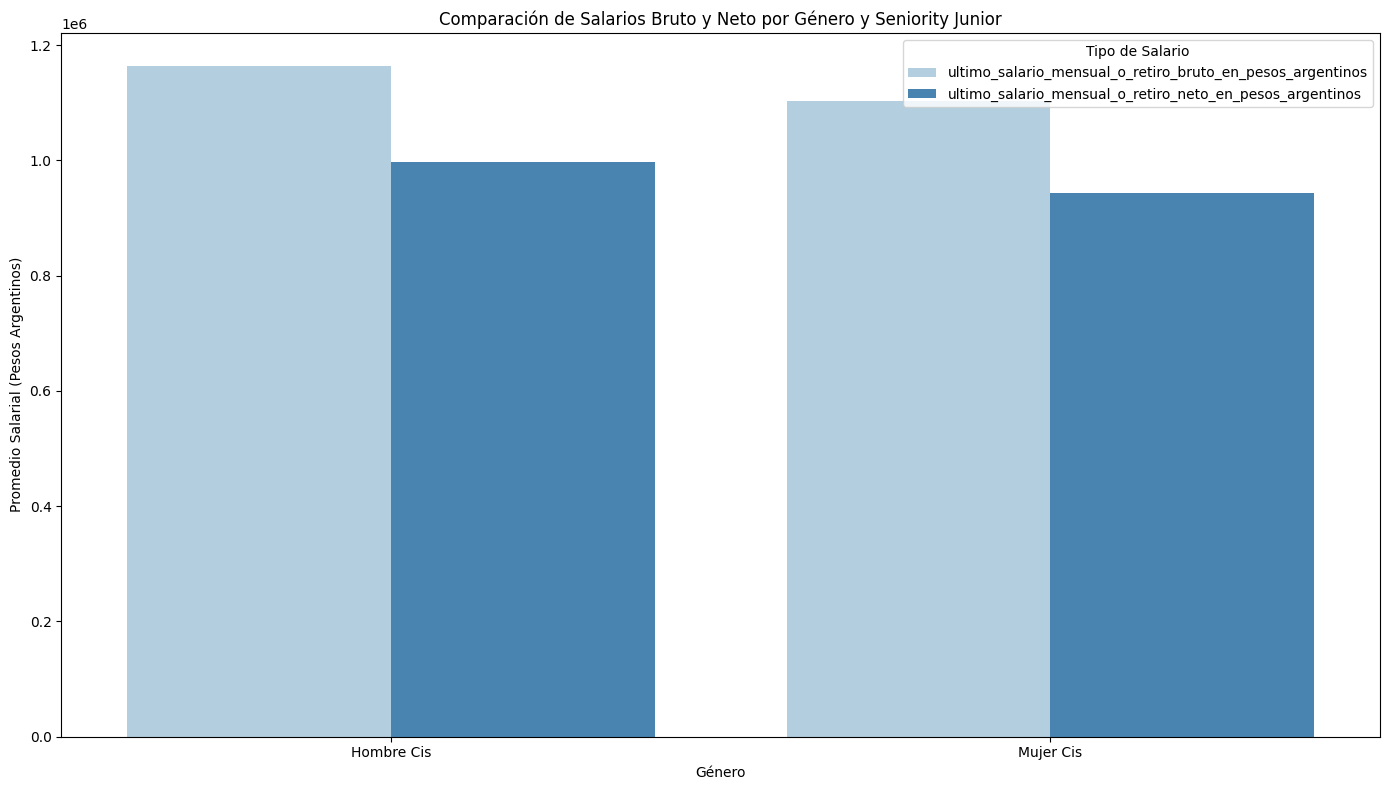

In [22]:
salario_neto_mensual = 'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'
salario_bruto_mensual = 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'

genero_filtrado = df[df['genero'].isin(['Mujer Cis', 'Hombre Cis'])]

seniority_filtrado = genero_filtrado[df['seniority'].isin(['Junior'])]

salario_por_genero = seniority_filtrado.groupby('genero')[[salario_bruto_mensual, salario_neto_mensual]].mean().reset_index()

# Imprimir resultados
print()
print("Promedio de salarios por género:")
print(salario_por_genero)
print()

salario_long = salario_por_genero.melt(id_vars='genero',
                                       value_vars=[salario_bruto_mensual, salario_neto_mensual],
                                       var_name='Tipo de Salario', value_name='Promedio')

plt.figure(figsize=(14, 8))
sns.barplot(data=salario_long, x='genero', y='Promedio', hue='Tipo de Salario', palette='Blues')

# Personalizar el gráfico
plt.title('Comparación de Salarios Bruto y Neto por Género y Seniority Junior')
plt.ylabel('Promedio Salarial (Pesos Argentinos)')
plt.xlabel('Género')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Salario')
plt.tight_layout()

# Mostrar el gráfico
plt.show()
print()

##Relación entre el Nivel Académico y Distribución de Sueldos Netos

En esta sección, se examinarán los datos de la columna `ultimo_salario_mensual_o_retiro_neto_en_pesos_argentino` con el objetivo de analizar cómo varían según el nivel académico alcanzado. El propósito es identificar el impacto que los diferentes niveles de formación académica tienen sobre los salarios netos.

<ipython-input-23-1f41a82fe482>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estadisticas_sueldos = df_nivel_academico.groupby('maximo_nivel_de_estudios')[


<Figure size 2000x2000 with 0 Axes>

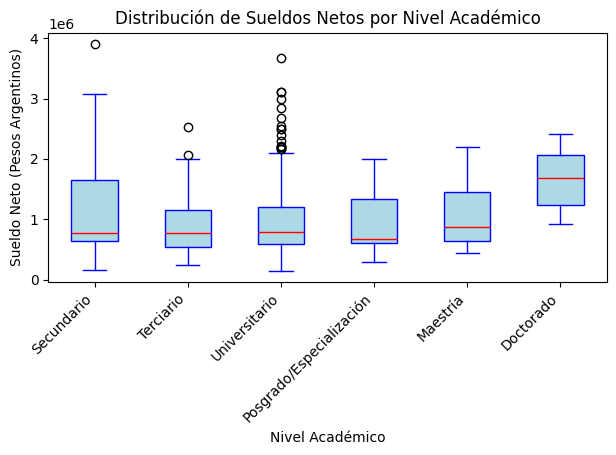

In [23]:

df_nivel_academico= df_junior[df_junior['maximo_nivel_de_estudios'].notna()]

df_nivel_academico = df_nivel_academico[df_nivel_academico ['maximo_nivel_de_estudios'] != 'Posdoctorado']

orden_niveles = ['Secundario','Terciario', 'Universitario', 'Posgrado/Especialización', 'Maestría', 'Doctorado']

df_nivel_academico['maximo_nivel_de_estudios'] = pd.Categorical(df_nivel_academico['maximo_nivel_de_estudios'], categories=orden_niveles, ordered=True)

estadisticas_sueldos = df_nivel_academico.groupby('maximo_nivel_de_estudios')[
    'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'
].agg(['mean', 'median', 'std']).reset_index()


estadisticas_sueldos = estadisticas_sueldos.sort_values('maximo_nivel_de_estudios')

plt.figure(figsize=(20, 20))
df_nivel_academico.boxplot(
    column='ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos',
    by='maximo_nivel_de_estudios',
    grid=False,
    showfliers=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue')
)
plt.title('Distribución de Sueldos Netos por Nivel Académico')
plt.suptitle('')  # Eliminar el título automático de pandas
plt.xlabel('Nivel Académico')
plt.ylabel('Sueldo Neto (Pesos Argentinos)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



##Impacto de los Lenguajes y Tecnologías en los Salarios Netos
Este gráfico compara los sueldos netos promedio de los profesionales IT Junior según las tecnologías más utilizadas por los encuestados. La línea de la mediana global de los sueldos netos permite identificar de manera rápida cuáles tecnologías están asociadas a salarios por encima o por debajo de este valor, brindando una perspectiva sobre el impacto de las habilidades técnicas en los ingresos

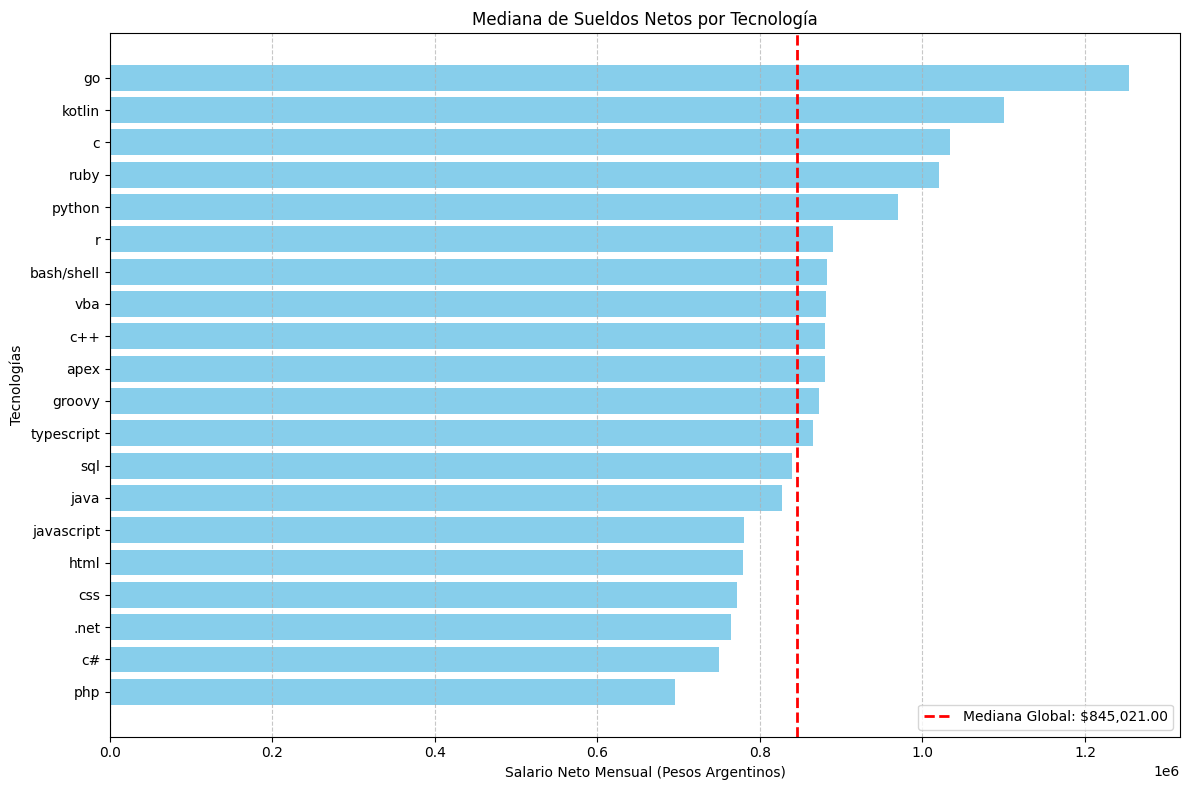

In [24]:
estadisticas = df_lenguajes_tecnologias.groupby('lenguajes_o_tecnologias')[salario_neto_mensual].agg(['max', 'median', 'min']).reset_index()

# Filtrar tecnologías con al menos 10 registros para mayor representatividad
tecnologias_filtradas = df_lenguajes_tecnologias['lenguajes_o_tecnologias'].value_counts()
tecnologias_filtradas = tecnologias_filtradas[tecnologias_filtradas >= 10].index
estadisticas_filtradas = estadisticas[estadisticas['lenguajes_o_tecnologias'].isin(tecnologias_filtradas)]

# Ordenar por salario mediano
estadisticas_filtradas = estadisticas_filtradas.sort_values(by='median', ascending=False)

#Calcular la mediana global de los sueldos netos:
sueldo_mediano_global=df_lenguajes_tecnologias[sueldo_neto_mensual].median()

# Graficar
plt.figure(figsize=(12, 8))
plt.barh(estadisticas_filtradas['lenguajes_o_tecnologias'], estadisticas_filtradas['median'], color='skyblue')
plt.axvline(
    x=sueldo_mediano_global,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Mediana Global: ${sueldo_mediano_global:,.2f}'
)
plt.xlabel('Salario Neto Mensual (Pesos Argentinos)')
plt.ylabel('Tecnologías')
plt.title('Mediana de Sueldos Netos por Tecnología')
plt.gca().invert_yaxis()  # Invertir el eje y para que la tecnología con mayor salario esté arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


##Verificar si el salario neto está influenciado por la experiencia

Este gráfico compara los últimos sueldos netos de los profesionales IT Junior encuestados con los años de experiencia que declararon.

Se puede observar que a partir del segundo año de experiencia comienzan a aparecer con más frecuencia sueldos superiores a los ARS2.000.000, por lo que podemos decir que: Si bien la mayoría de Juniors cobran alrededor de ARS1.000.000, conforme se gana más experiencia es más probable que se pueda obtener un sueldo más alto

Text(0.5, 1.0, 'Relación entre los Años de Experiencia y el Sueldo Neto Mensual')

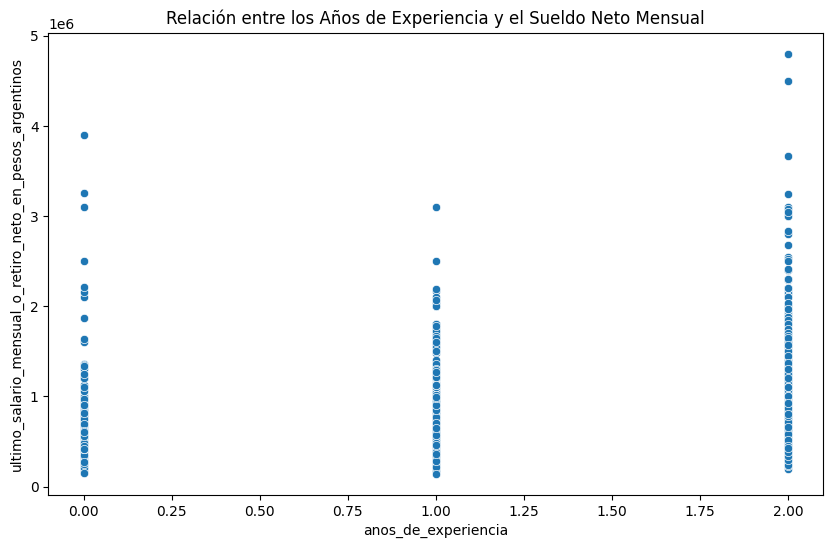

In [25]:
# Sacamos del análisis los casos excepcionales que cobran arriba del millón de pesos.
# Se recortó el salario en 10.000.000 porque había 2 respuestas de la encuesta que presenteaban inconsistencias entre seniority y cargo.
df_salario_experiencia = df_junior[['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos','anos_de_experiencia']][df_junior['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'] < 10000000]

# Gráfico de dispersión de años de experiencia y salario
plt.figure(figsize=(10, 6))
sns.scatterplot(x='anos_de_experiencia', y='ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos', data=df_salario_experiencia)
plt.title('Relación entre los Años de Experiencia y el Sueldo Neto Mensual')